# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Install additional libraries

In [ ]:
# Install libraries for ZIP code lookup
!pip install uszipcode

## Importing necessary libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for ZIP code lookup
import uszipcode as zip

# Import libraries for error handling
import warnings

# Import libraries for ML-scikit-learn
import sklearn.model_selection as sms
import sklearn.tree as ste
import sklearn.metrics as smt

#Import libraries for statistics
import scipy.stats as stt

In [ ]:
# Apply settings

# Ignore warnings
warnings.filterwarnings('ignore')

# Remove the limit for the displayed columns in a DataFrame
pd.set_option('display.max_columns', None)

# Set precision of floating numbers to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Loading the dataset

In [ ]:
# Read the file
df = pd.read_csv('/content/alllife_customer.csv')

## Data Overview

In [ ]:
# Display the rows and shape of the DataFrame
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0


In [ ]:
# Display the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Display how many duplicate records are present in the dataset
df.duplicated().sum()

0

In [ ]:
# Display how many duplicate customer IDs are present in the dataset
df[df['ID'].duplicated() == True]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [ ]:
# Display unique values in the dataset
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
# Display the statistical summary of all columns
df.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.00000,2500.50000,1443.52000,1.00000,1250.75000,2500.50000,3750.25000,5000.00000
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
# Create a list of all categorical columns and numerical columns for additional analysis
cat_cols = ['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [ ]:
# Display the count of unique categorical values in each column
for cat_col in cat_cols:
  print(df[cat_col].value_counts(dropna = False))
  print('-' * 50)

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64
--------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


In [ ]:
# Display the percentage of unique categorical values in each column
for cat_col in cat_cols:
  print(df[cat_col].value_counts(normalize = True, dropna = False).mul(100))
  print('-' * 50)

94720   3.38000
94305   2.54000
95616   2.32000
90095   1.42000
93106   1.14000
          ...  
96145   0.02000
94087   0.02000
91024   0.02000
93077   0.02000
94598   0.02000
Name: ZIPCode, Length: 467, dtype: float64
--------------------------------------------------
1   29.44000
2   25.92000
4   24.44000
3   20.20000
Name: Family, dtype: float64
--------------------------------------------------
1   41.92000
3   30.02000
2   28.06000
Name: Education, dtype: float64
--------------------------------------------------
0   90.40000
1    9.60000
Name: Personal_Loan, dtype: float64
--------------------------------------------------
0   89.56000
1   10.44000
Name: Securities_Account, dtype: float64
--------------------------------------------------
0   93.96000
1    6.04000
Name: CD_Account, dtype: float64
--------------------------------------------------
1   59.68000
0   40.32000
Name: Online, dtype: float64
--------------------------------------------------
0   70.60000
1   29.40000
Nam

**Observations:**
* The dataset contains 5,000 rows with 14 columns.
* The size of the DataFrame is 547.0 KB.
* The dataset has no duplicate records or duplicate customer IDs.
* All columns in the dataset have a value count of 5,000, indicating that there are no missing values.
* There are two data types in the dataset:
  * int64 (13): ID, Age, Experience, Income, ZIPCode, Family, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard
  * float64 (1): CCAvg
* The column ID contains customer IDs with all unique values. Hence, it was dropped as it will not be used during the analysis.
* The columns Securities_Account, CD_Account, Online and CreditCard contains 2 unique values:
  * 0 - No
  * 1 - Yes
* The column Education contains 3 unique values:
  * 1 - Undergraduate
  * 2 - Graduate
  * 3 - Advanced/ Professional
* The column Family contains 4 unique values (i.e. family size from 1 to 4).
* The column Experience has a minimum value of -3. This can be due to error during data entry and will need to be analyzed/ treated.
* The column Mortgage has a Q1 (minimum) and (Q2) median value of \$0, with Q3 and Q4 being \$101K and \$635K respectively, indicating that the column is heavily right skewed.

## Exploratory Data Analysis

### Function Definition

In [ ]:
# User-defined functions
def show_boxplot_histplot(data, feature, hue = None, figsize = (11.75, 7), kde = True, bins = None):
  '''
  Description: Function to plot a boxplot and a histogram along the same scale
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    hue: str, optional
      To show the hue, default: None
    figsize: tuple, optional
      The figure size in inches, default: (11.75, 7)
    kde: bool, optional
      To show the kernel density estimate, default: True
    bins: int, optional
      The number of bins for histogram, default: None
  '''
  # Creating the 2 subplots
  f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows = 2,
    sharex = True,
    gridspec_kw = {'height_ratios': (0.25, 0.75)},
    figsize = figsize
  )

  # Adjust the subplot layout parameters
  f2.subplots_adjust(hspace = 0.25)

  # Create the boxplot with a star to indicate the mean value of the column
  sns.boxplot(
    data = data,
    x = feature,
    hue = hue,
    ax = ax_box2,
    showmeans = True,
    color = 'violet'
  )

  # Create the histogram
  if bins:
    sns.histplot(
      data = data,
      x = feature,
      hue = hue,
      kde = kde,
      ax = ax_hist2,
      bins = bins,
      palette = 'winter'
    )
  else:
    sns.histplot(
      data = data,
      x = feature,
      hue = hue,
      kde = kde,
      ax = ax_hist2
    )

  # Add mean to the histogram
  ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = '--')

  # Add median to the histogram
  ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = '-')

  # Set title
  ax_box2.set_title(('Boxplot of ' + feature), fontsize = 11)
  ax_hist2.set_title(('Distribution of ' + feature), fontsize = 11)

def show_countplot(data, feature, hue = None, n = None, ascending = False, figsize = (11.75, 5)):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    hue: str, optional
      To show the hue, default: None
    n: int, optional
      To show the top n category levels, default: None (display all levels)
    ascending: bool, optional
      To sort the bar by count, default: False
    figsize: tuple, optional
      The figure size in inches, default: (11.75, 5)
  '''
  total = len(data[feature])
  count = data[feature].nunique()
  order = data[feature].value_counts().index.tolist()[:n]

  if ascending == True:
    order.reverse()

  plt.figure(figsize = figsize)
  plt.xticks(rotation = 90)
  plt.xlim(0, data[feature].value_counts().tolist()[0] * 1.5)

  if hue == None:
    hue = feature

  ax = sns.countplot(
    data = data,
    y = feature,
    hue = hue,
    palette = 'Paired',
    order = order,
    legend = False
  )

def get_outliers(data, feature):
  '''
  Description: Function that will return the outliers from a DataFrame
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
  '''
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)

  iqr = q3 - q1

  data = data[((data[feature] < (q1 - 1.5 * iqr)) | (data[feature] > (q3 + 1.5 * iqr)))]

  return data

def show_pairplot(data, diag_kind = 'kde', height = 2, hue = None):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    diag_kind: str, optional
      The type of pairplot diagram, default: kde
    height: int, optional
      The plot size in inches, default: 2
    hue: str, optional
      To show the hue, default: None
  '''
  if hue:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height, hue = hue)
    ax.fig.suptitle('Relationship of Numerical Variables with regards to ' + hue, y = 1.005, size = 11)
  else:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height)
    ax.fig.suptitle('Relationship of Numerical Variables', y = 1.005, size = 11)

  plt.show()

def show_heatmap(data, figsize = (12, 9), cmap = 'Spectral', annot = True, vmin = -1, vmax = 1, fmt = '.2f'):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    figsize: tuple, optional
      The figure size in inches, default: (12, 9)
    cmap: str, optional
      To color map name, default: Spectral
    vmin: float, optional
      The minimum value to anchor the color map, default: -1
    vmax: float, optional
      The maximum value to anchor the color map, default: 1
    fmt: str, optional
      The formatting used in the annotation, default: .2f
  '''
  plt.figure(figsize = figsize)

  ax = sns.heatmap(data.corr(), annot = annot, vmin = vmin, vmax = vmax, fmt = fmt, cmap = cmap)

  ax.set_title('Correlation of Numerical Variables', fontsize = 11)

  plt.show()

def show_distplot_boxplot(data, feature, target, figsize = (10, 7)):
  '''
  Description: Function to plot a histogram and a boxplot with hue along the same scale
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    target: str, required
      To show the diagrams based on the target's value
    figsize: tuple, optional
      The figure size in inches, default: (10, 7)
  '''
  fig, axs = plt.subplots(2, 2, figsize = figsize)

  target_uniq = data[target].unique()

  axs[0, 0].set_title('Distribution of ' + feature + ' for ' + target + ' = ' + str(target_uniq[0]), fontsize = 11)
  sns.histplot(
    data = data[data[target] == target_uniq[0]],
    x = feature,
    kde = True,
    ax = axs[0, 0],
    color = 'teal',
    stat = 'density',
  )

  axs[0, 1].set_title('Distribution of ' + feature + ' for ' + target + ' = ' + str(target_uniq[1]), fontsize = 11)
  sns.histplot(
    data = data[data[target] == target_uniq[1]],
    x = feature,
    kde = True,
    ax = axs[0, 1],
    color = 'orange',
    stat = 'density',
  )

  axs[1, 0].set_title('Boxplot of ' + feature + ' w/ regards to ' + target, fontsize = 11)
  sns.boxplot(
    data = data,
    x = target,
    y = feature,
    hue = target,
    ax = axs[1, 0],
    palette = 'gist_rainbow',
    legend = False
  )

  axs[1, 1].set_title('Boxplot (w/o outliers) of ' + feature + ' w/ regards to ' + target, fontsize = 11)
  sns.boxplot(
    data = data,
    x = target,
    y = feature,
    hue = target,
    ax = axs[1, 1],
    showfliers = False,
    palette = 'gist_rainbow',
    legend = False
  )

  plt.tight_layout()
  plt.show()

def show_stackedbarplot(data, feature, target, figsize = (5, 3)):
  '''
  Description: Function to plot a stacked barplot with hue within the same bar
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    target: str, required
      To display the hue within the same plot using the target's value
    figsize: tuple, optional
      The figure size in inches, default: (5, 3)
  '''
  count = data[feature].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[feature], data[target], margins = True)

  display(tab1)

  tab2 = pd.crosstab(data[feature], data[target], normalize = 'index').sort_values(by = sorter, ascending = False)
  ax = tab2.plot(kind = 'bar', stacked = True, figsize = figsize)
  ax.set_title('Stacked Barplot of ' + feature + ' w/ regards to ' + target, fontsize = 11)

  plt.legend(loc = 'lower left', frameon = False)
  plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
  plt.show()

def show_pointplot(data, feature, category, target, estimator = 'mean', figsize = (5, 3)):
  '''
  Description: Function to plot a pointlot with category variable and hue
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    feature: str, required
      Name of the feature column
    category: str, required
      Name of the categorical column
    target: str, required
      To display the hue within the same plot using the target's value
    estimator: str, required
      The calculated cetral tendency of the feature , default: mean
    figsize: tuple, optional
      The figure size in inches, default: (5, 3)
  '''
  plt.figure(figsize = figsize)

  ax = sns.pointplot(data = data, y = feature, x = category, hue = target, estimator = estimator)
  ax.set_title('Pointplot of ' + feature + ' per ' + category + ' w/ regards to ' + target, fontsize = 11)

  plt.show()

def show_significance(data, target, significance_level = 0.05):
  '''
  Description: Function to significance of each feature variables vs target variable
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    target: str, required
      To display the hue within the same plot using the target's value
    significance_level: float, optional
      The significance level where the p_value will be compared with, default: 0.05
  '''
  for feature in list(data.columns):
    if target != feature:
      crosstab = pd.crosstab(data[target], data[feature])

      chi, p_value, dof, expected = stt.chi2_contingency(crosstab)

      if p_value < significance_level:
        print('*', feature, 'score has an effect on', target, 'as the p_value', p_value.round(3), '< significance_level', significance_level)
      else:
        print(' ', feature, 'score has no effect on', target, 'as the p_value', p_value.round(3), '>= significance_level', significance_level)

### Univariate Analysis

##### Observations on Age:

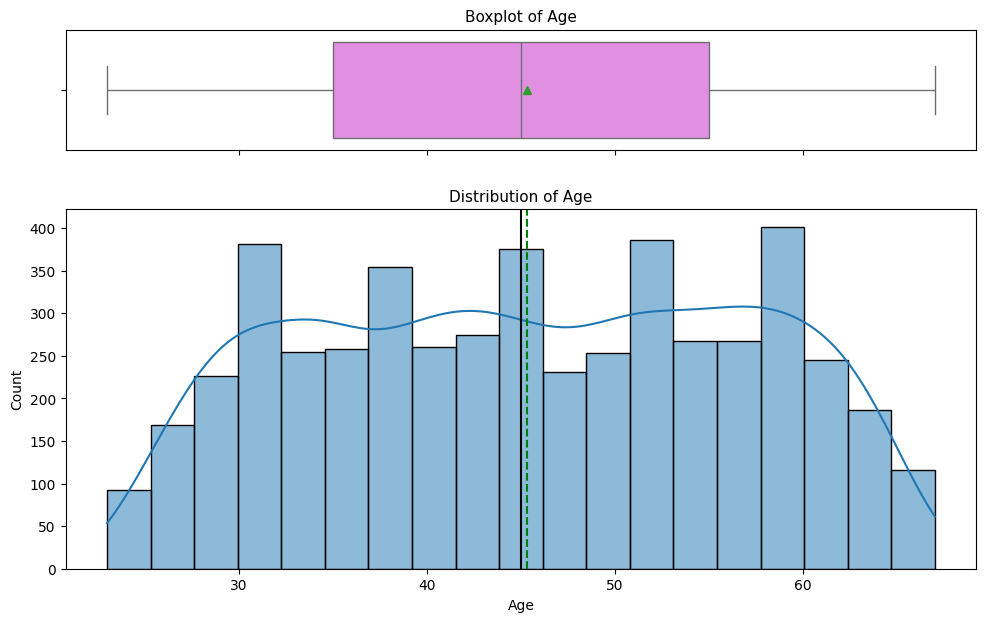

In [ ]:
# Display the distribution of customers with regards to Age
show_boxplot_histplot(data = df, feature = 'Age')

**Observations:**
* Age does not have a sharp bell curve and slightly follows uniform distribution.
* There are no outliers present in this column.
* The mean value is near the median.
* The mean and median age is close to 45 years old.

##### Observations on Experience:

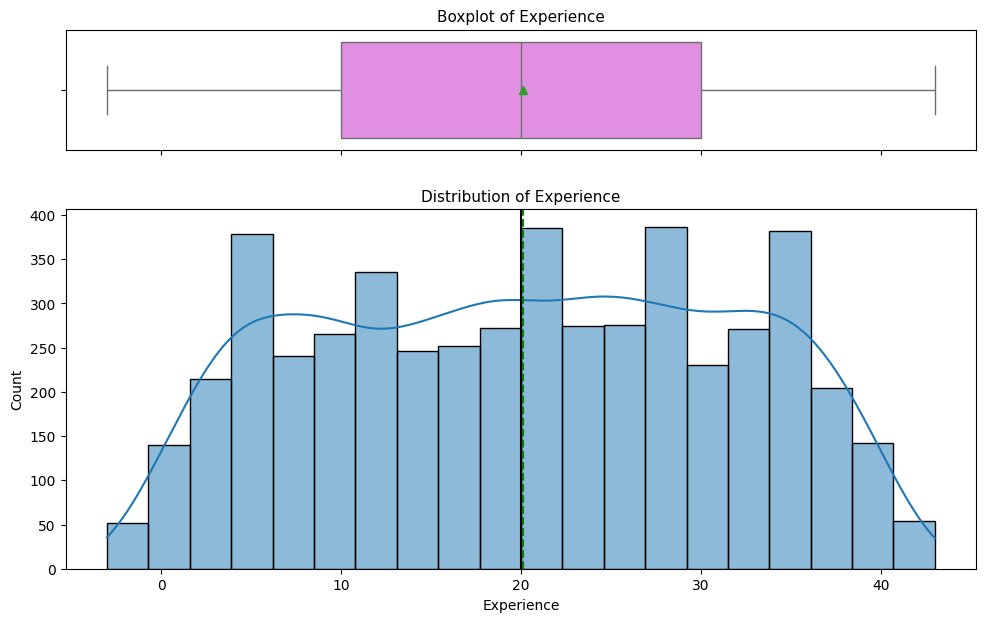

In [ ]:
# Display the distribution of customers with regards to Experience
show_boxplot_histplot(data = df, feature = 'Experience')

In [ ]:
# Display less than 0 years of Experience
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [ ]:
# Experience contains invalid values (i.e. -1, -2 and -3). This can be due to error during data entry

# We will perform imputation using median value to fix this column
df['Experience'] = df['Experience'].apply(lambda exp: df['Experience'].median() if exp < 0 else exp)
df['Experience'] = df['Experience'].astype(int)

df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0


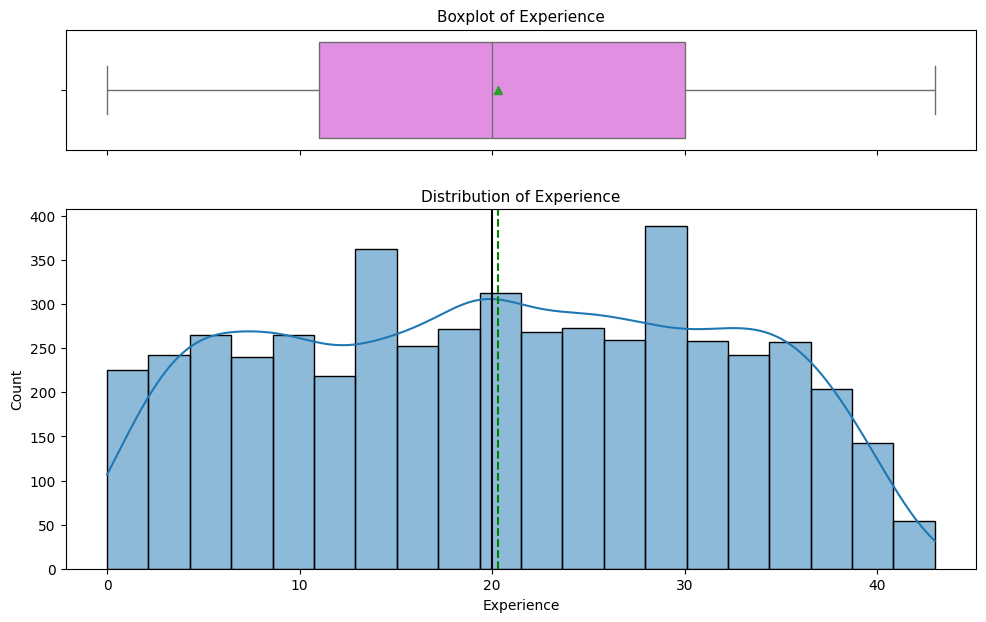

In [ ]:
# Display the distribution of customers with regards to Experience (after imputation)
show_boxplot_histplot(data = df, feature = 'Experience')

**Observations:**
* Experience contains incorrect values (-1, -2 and -3). This can be due to error during data entry. Hence, it was imputated using the median value.
* Experience does not have a sharp bell curve and slightly follows uniform distribution.
* There are no outliers present in this column.
* The mean value is near the median.
* The mean and median experience is close to 20 years.

##### Observations on Income:

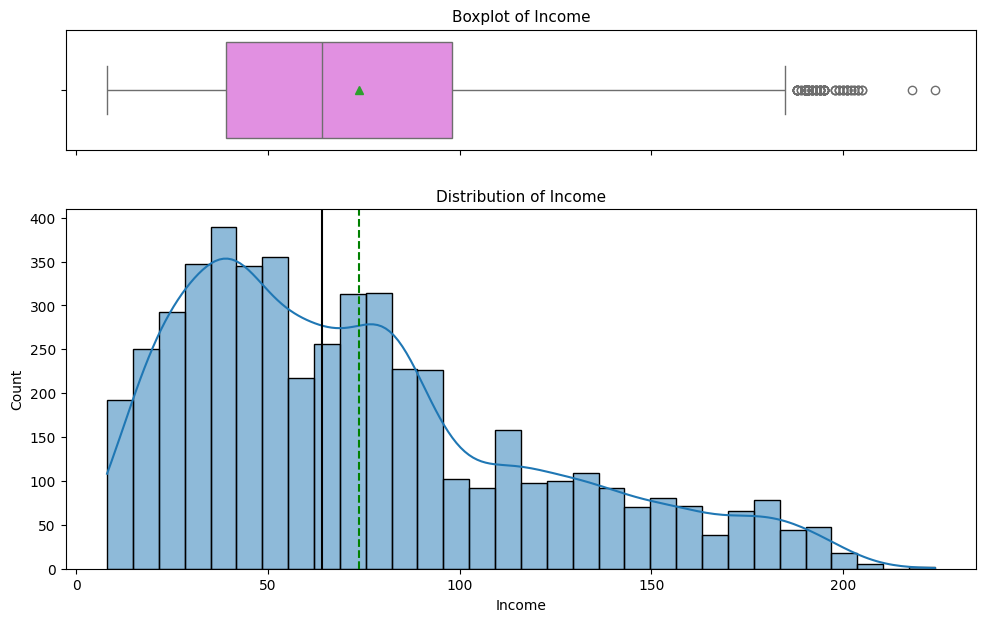

In [ ]:
# Display the distribution of customers with regards to Income
show_boxplot_histplot(data = df, feature = 'Income')

In [ ]:
# Create a dataset of outliers for Income
df_income_outliers = get_outliers(data = df, feature = 'Income')

df_income_outliers

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
18,19,46,21,193,91604,2,8.10000,3,0,1,0,0,0,0
47,48,37,12,194,91380,4,0.20000,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.10000,3,240,1,0,0,1,0
59,60,31,5,188,91320,2,4.50000,1,455,0,0,0,0,0
303,304,49,25,195,95605,4,3.00000,1,617,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,4660,28,4,199,92121,1,6.33000,1,0,0,0,0,0,0
4670,4671,52,26,194,94305,1,1.70000,1,0,0,0,0,1,0
4895,4896,45,20,201,92120,2,2.80000,1,0,0,0,0,1,1
4981,4982,34,9,195,90266,2,3.00000,1,122,0,0,0,1,0


**Observations:**
* Income is right skewed.
* There are 96 outliers present in this column.
* The mean income is close to \$73K, while the median income is close to \$64K.

##### Observations on CCAvg:

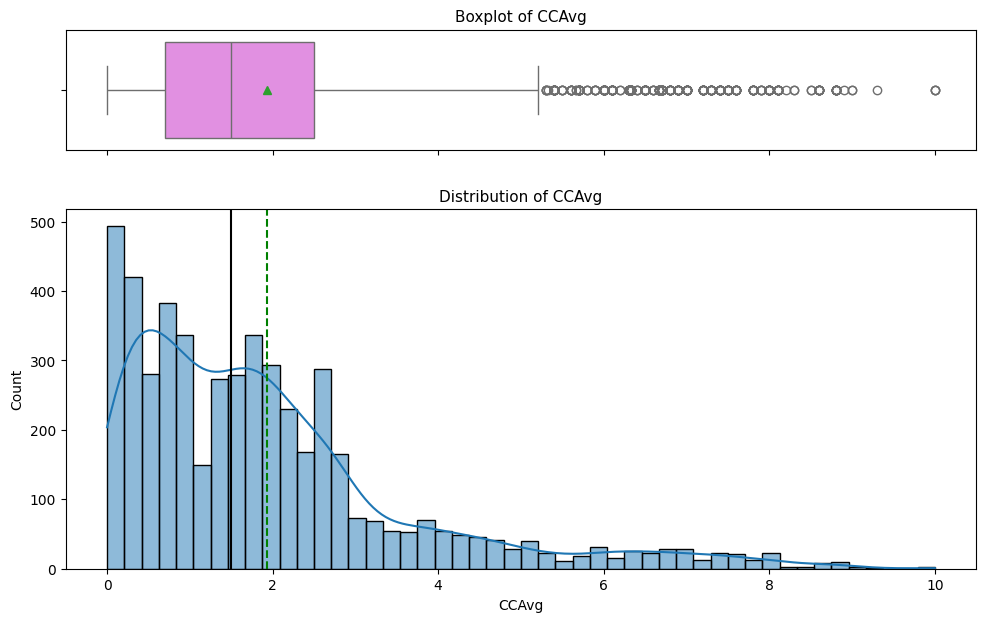

In [ ]:
# Display the distribution of customers with regards to CCAvg
show_boxplot_histplot(data = df, feature = 'CCAvg')

In [ ]:
# Create a dataset of outliers for CCAvg
df_ccavg_outliers = get_outliers(data = df, feature = 'CCAvg')

df_ccavg_outliers

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,10,34,9,180,93023,1,8.90000,3,0,1,0,0,0,0
18,19,46,21,193,91604,2,8.10000,3,0,1,0,0,0,0
44,45,46,20,104,94065,1,5.70000,1,0,0,0,0,1,1
55,56,41,17,139,94022,2,8.00000,1,0,0,0,0,1,0
61,62,47,21,125,93407,1,5.70000,1,112,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,4909,40,16,138,92121,2,6.10000,1,0,0,0,0,1,0
4911,4912,46,22,153,94539,2,7.50000,1,0,0,0,0,0,0
4937,4938,33,8,162,94960,1,8.60000,1,0,0,0,1,1,1
4980,4981,29,5,135,95762,3,5.30000,1,0,1,0,1,1,1


**Observations:**
* CCAvg is heavily right skewed.
* There are 324 outliers present in this column.
* The mean credit card average spending is close to \$1.9K, while the median credit card average spending is close to \$1.5K.

##### Observations on Mortgage:

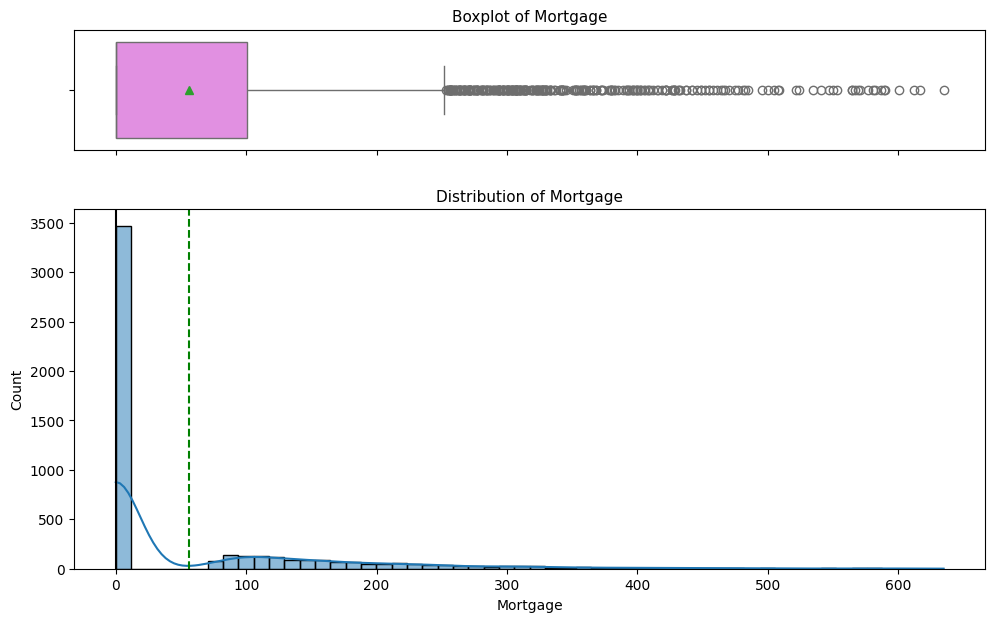

In [ ]:
# Display the distribution of customers with regards to Mortgage
show_boxplot_histplot(data = df, feature = 'Mortgage')

In [ ]:
# Create a dataset of outliers for Mortgage
df_mortgage_outliers = get_outliers(data = df, feature = 'Mortgage')

df_mortgage_outliers

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
22,23,29,5,62,90277,1,1.20000,1,260,0,0,0,1,0
39,40,38,13,80,94115,4,0.70000,3,285,0,0,0,1,0
42,43,32,7,132,90019,4,1.10000,2,412,1,0,0,1,0
59,60,31,5,188,91320,2,4.50000,1,455,0,0,0,0,0
66,67,62,36,105,95670,2,2.80000,1,336,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4860,34,8,165,91107,1,7.00000,3,541,1,0,0,0,0
4865,4866,50,24,133,90025,4,1.40000,2,342,1,0,0,0,1
4899,4900,54,29,85,94928,4,1.30000,3,299,0,0,0,1,0
4942,4943,52,26,109,94710,1,2.40000,1,308,0,0,1,1,1


**Observations:**
* Mortgage is heavily right skewed.
* There are 291 outliers present in this column.
* The mean mortgage is close to \$56.5K, while the median mortgage is \$0.

##### Observations on ZIPCode/ City_State):

In [ ]:
# Create a new column with the City, State and ZIP code
df['City_State_ZIPCode'] = df['ZIPCode'].apply(lambda code, search = zip.SearchEngine(): search.by_zipcode(code).major_city + ', ' + search.by_zipcode(code).state + ' ' + str(code) if search.by_zipcode(code) else np.nan)

# Create a new column with the City and State
df['City_State'] = df['ZIPCode'].apply(lambda code, search = zip.SearchEngine(): search.by_zipcode(code).major_city + ', ' + search.by_zipcode(code).state if search.by_zipcode(code) else np.nan)

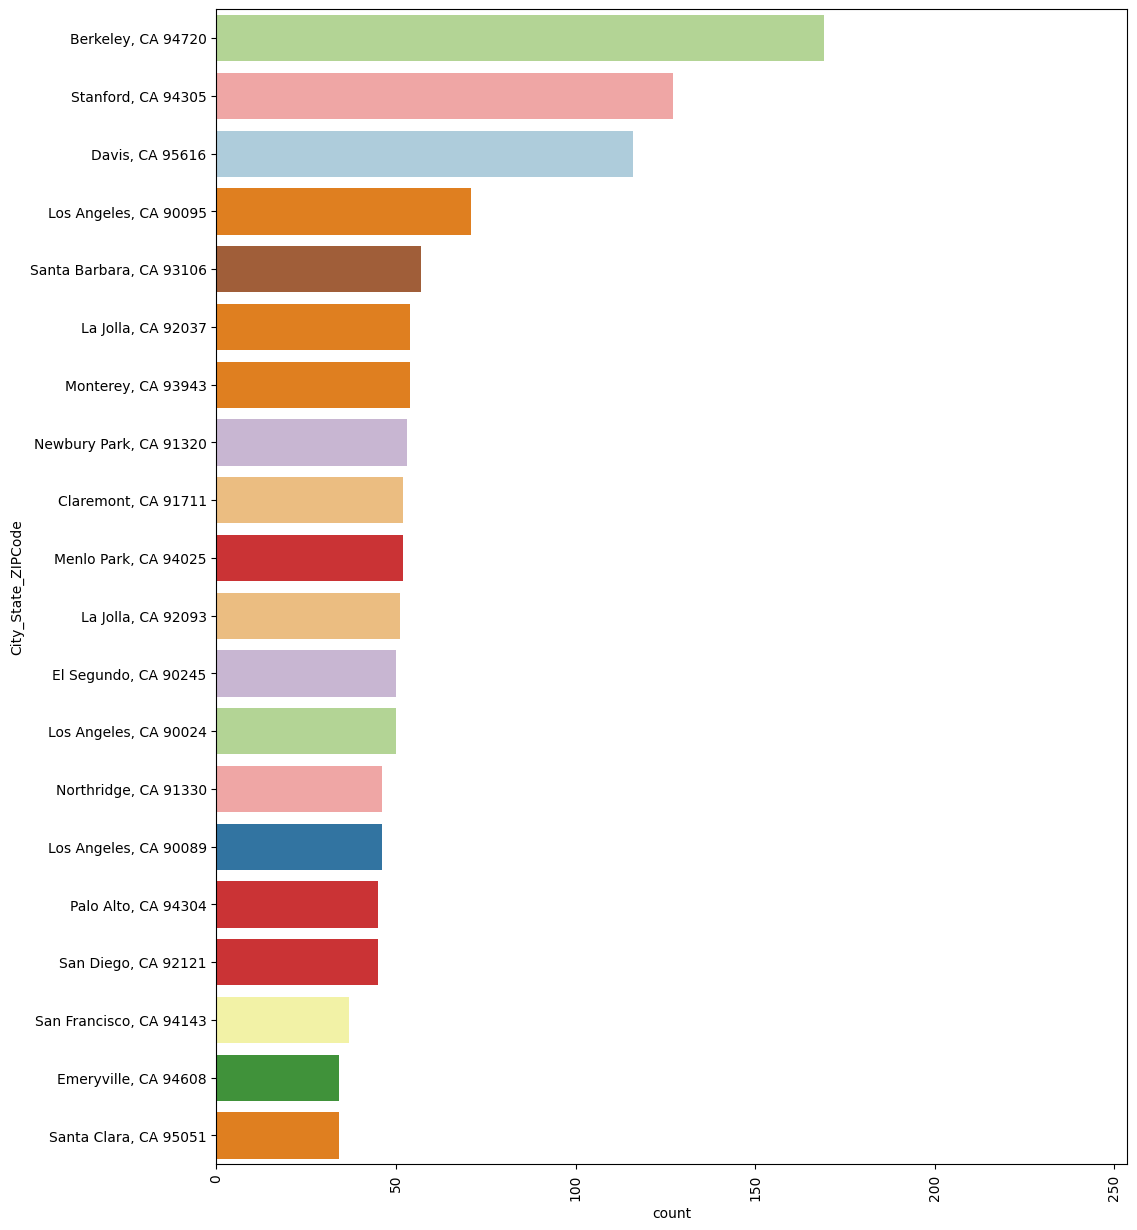

In [ ]:
# Display the number of customers with regards to City_State_ZIPCode (filtered to top 20)
show_countplot(data = df, feature = 'City_State_ZIPCode', n = 20, figsize = (11.75, 15))

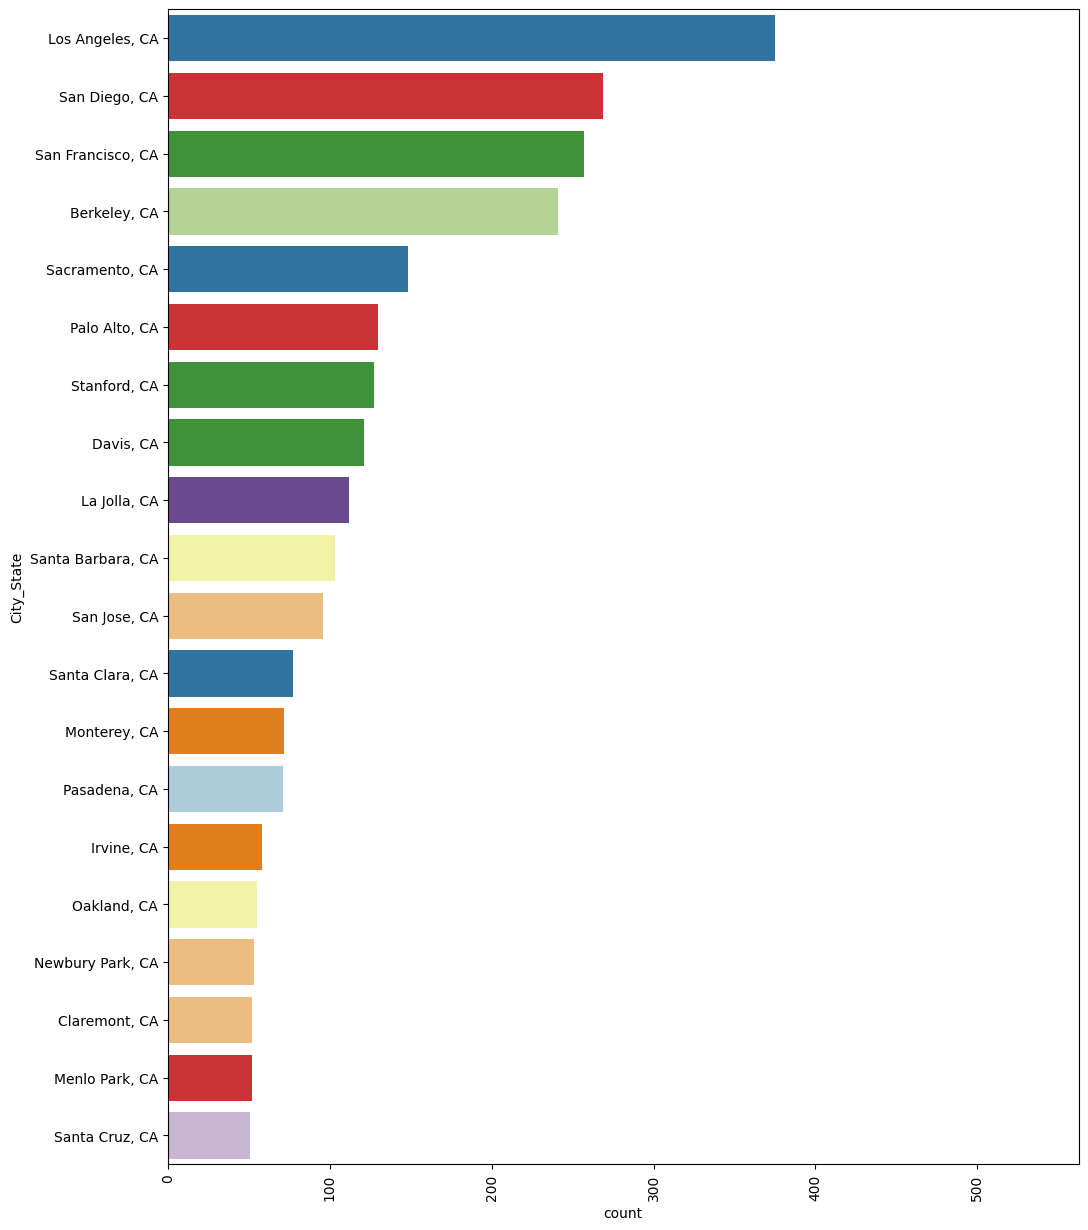

In [ ]:
# Display the number of customers with regards to City_State (filtered to top 20)
show_countplot(data = df, feature = 'City_State', n = 20, figsize = (11.75, 15))

**Observations:**
* City_State_ZIPCode shows a higher number of customers reside from 94720 - Berkeley, CA (with 169). List is followed by:
  * 94305 - Stanford, CA (with 127)
  * 95616 - Davis, CA (with 116)
  * 90095 - Los Angeles, CA (with 71)
  * 93106 - Santa Barbara, CA (with 57)
  * 92037 - La Jolla, CA (with 54)
  * 93943 - Monterey, CA (with 54)
  * 91320 - Newburry Park, CA (with 53)
  * 91711 - Claremont, CA (with 52)
  * 94025 - Menlo Park, CA (with 52)
  * 92093 - La Jolla, CA (with 51)
  * 90245 - El Segundo, CA (with 50)
  * 90024 - Los Angeles, CA (with 50)
  * 91330 - Northridge, CA (with 46)
  * 90089 - Los Angeles, CA (with 46)
  * 94304 - Palo Alto, CA (with 45)
  * 92121 - San Diego, CA (with 45)
  * 94143 - San Francisco, CA (with 37)
  * 94608 - Emeryvile, CA (with 34)
  * 95051 - Santa Clara, CA (with 34)
* City_State shows a higher number of customers reside from Los Angeles, CA (with 375). List is followed by:
  * San Diego, CA (with 269)
  * San Francisco, CA (with 257)
  * Berkeley, CA (with 241)
  * Sacramento, CA (with 148)
  * Palo Alto, CA (with 130)
  * Stanford, CA (with 127)
  * Davis, CA (with 121)
  * La Jolla, CA (with 112)
  * Santa Barbaba, CA (with 103)
  * San Jose, CA (with 96)
  * Santa Clara, CA (with 77)
  * Monterey, CA (with 72)
  * Pasadena, CA (with 71)
  * Irvine, CA (with 58)
  * Oakland, CA (with 55)
  * Newburry Park, CA(with 53)
  * Claremont, CA (with 52)
  * Menlo Park, CA (with 52)
  * Santa Cruz, CA (with 51)
* The top 20 ZIP codes and top 20 Cities all belong to the State of California.

##### Observations on Family:

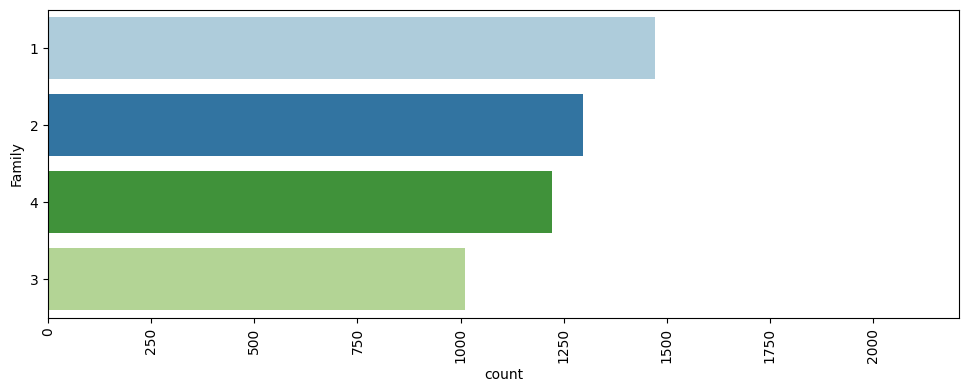

In [ ]:
# Display the number of customers with regards to Family
show_countplot(data = df, feature = 'Family', figsize = (11.75, 4))

**Observations:**
* Family shows a higher number of customers have a family size of 1 (with 1,472). List is followed by:
  * Family size of 2 (with 1,296)
  * Family size of 4 (with 1,222)
  * Family size of 3 (with 1,010)

##### Observations on Education:

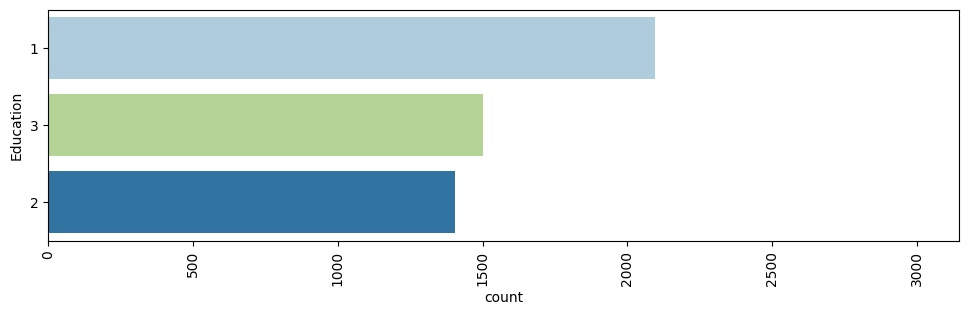

In [ ]:
# Display the number of customers with regards to Education
show_countplot(data = df, feature = 'Education', figsize = (11.75, 3))

**Observations:**
* Education shows a higher number of customers have education level 1 - Undergraduate (with 2,096). List is followed by:
  * Educational level 3 - Advanced/ Professional (with 1,501)
  * Educational level 2 - Graduate (with 1,403)


##### Observations on Personal_Loan:

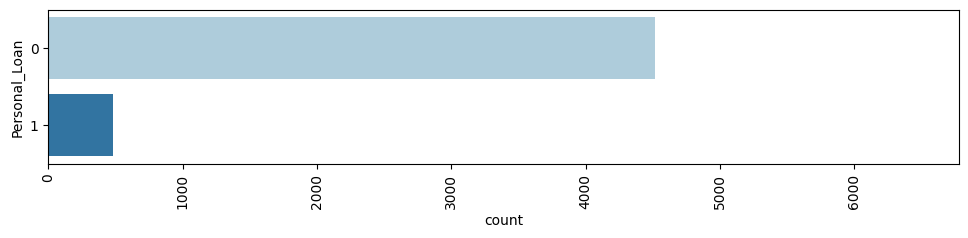

In [ ]:
# Display the number of customers with regards to Personal_Loan
show_countplot(data = df, feature = 'Personal_Loan', figsize = (11.75, 2))

**Observations:**
* Personal_Loan shows a higher number of customers did not accept a loan (with 4,520) compared to customers that have accepted a loan (with 480).

##### Observations on Securities_Account:

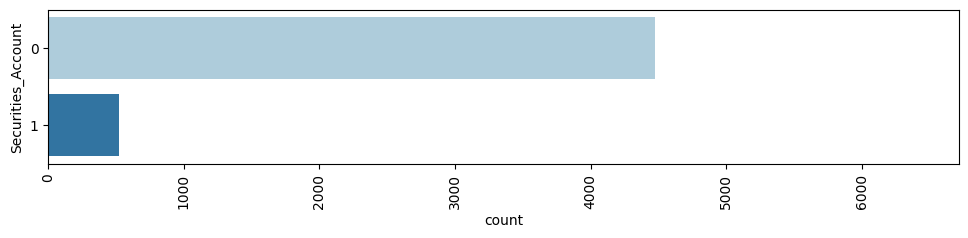

In [ ]:
# Display the number of customers with regards to Securities_Account
show_countplot(data = df, feature = 'Securities_Account', figsize = (11.75, 2))

**Observations:**
* Securities_Account shows a higher number of customers do not have securities account (with 4,478) compared to customers that do have securities account (with 522).

##### Observations on CD_Account:

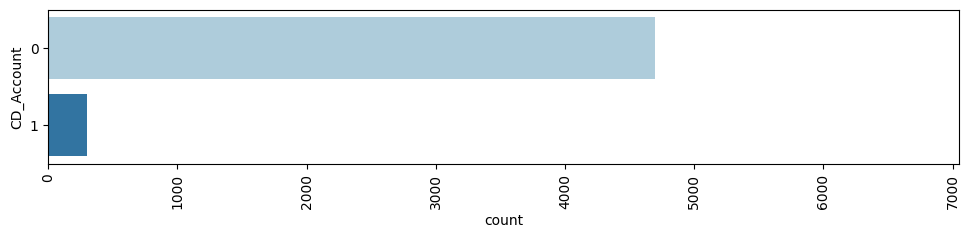

In [ ]:
# Display the number of customers with regards to CD_Account
show_countplot(data = df, feature = 'CD_Account', figsize = (11.75, 2))

**Observations:**
* CD_Account shows a higher number of customers do not have certificate of deposit account (with 4,698) compared to customers that do have certificate of deposit account (with 302).

##### Observations on Online:

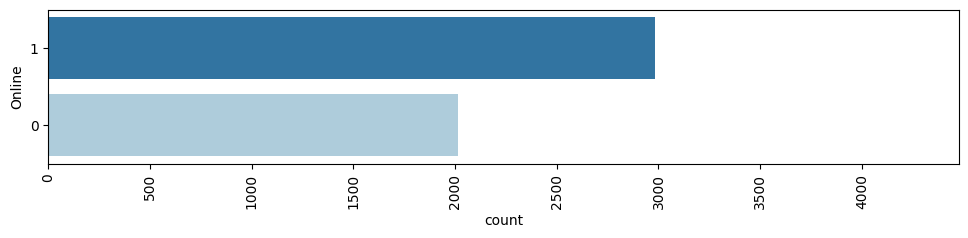

In [ ]:
# Display the number of customers with regards to Online
show_countplot(data = df, feature = 'Online', figsize = (11.75, 2))

**Observations:**
* Online shows a higher number of customers have used the online banking facilities (with 2,984) compared to customers that have not used the online banking facilities (with 2,016).

##### Observations on CreditCard:

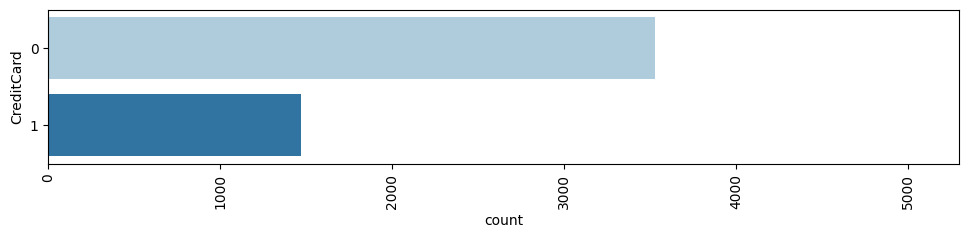

In [ ]:
# Display the number of customers with regards to CreditCard
show_countplot(data = df, feature = 'CreditCard', figsize = (11.75, 2))

**Observations:**
* CreditCard shows a higher number of customers have not used the credit card issued by other banks (with 3,530) compared to customers that have used the credit card issued by other banks (with 1,470).

### Multivariate Analysis

##### Observations on Numerical Variable Relationships:

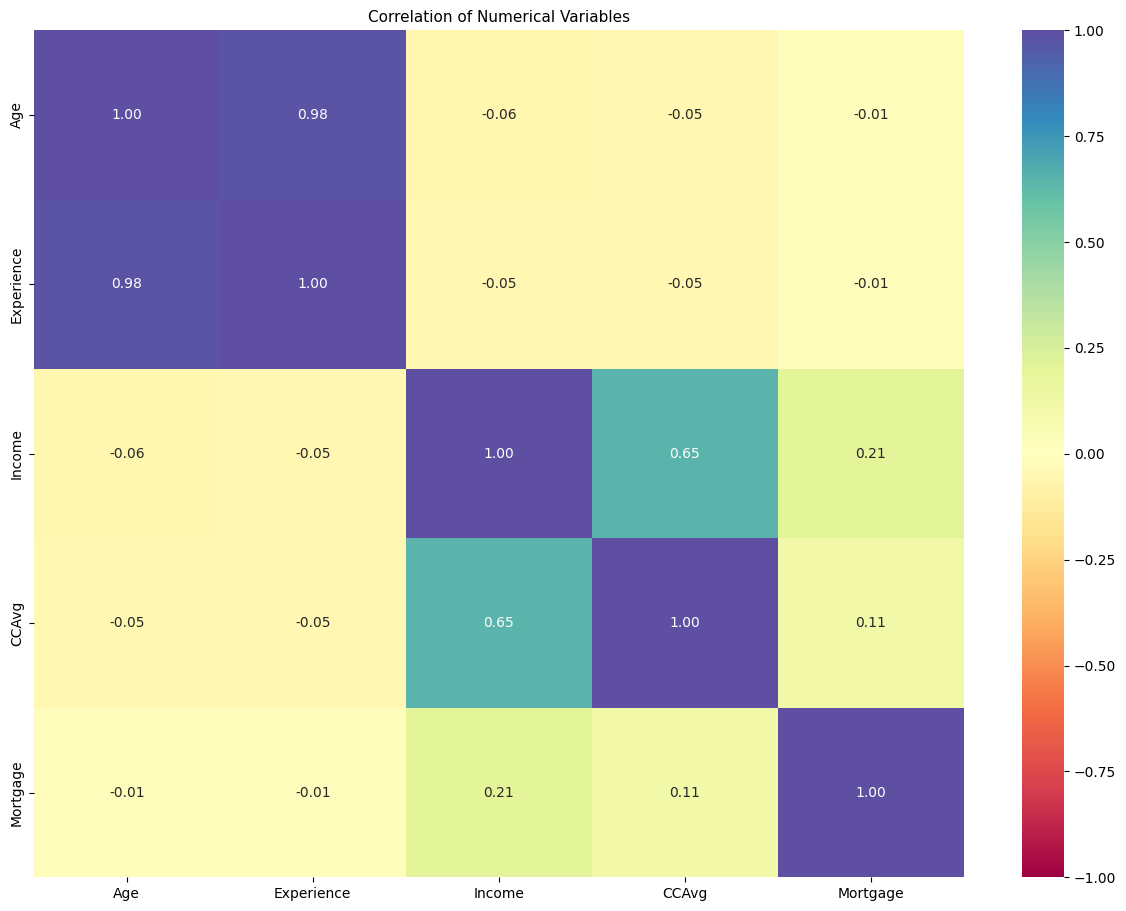

In [ ]:
# Display the relationships of Numerical Variables
show_heatmap(data = df[num_cols], figsize = (15, 11))

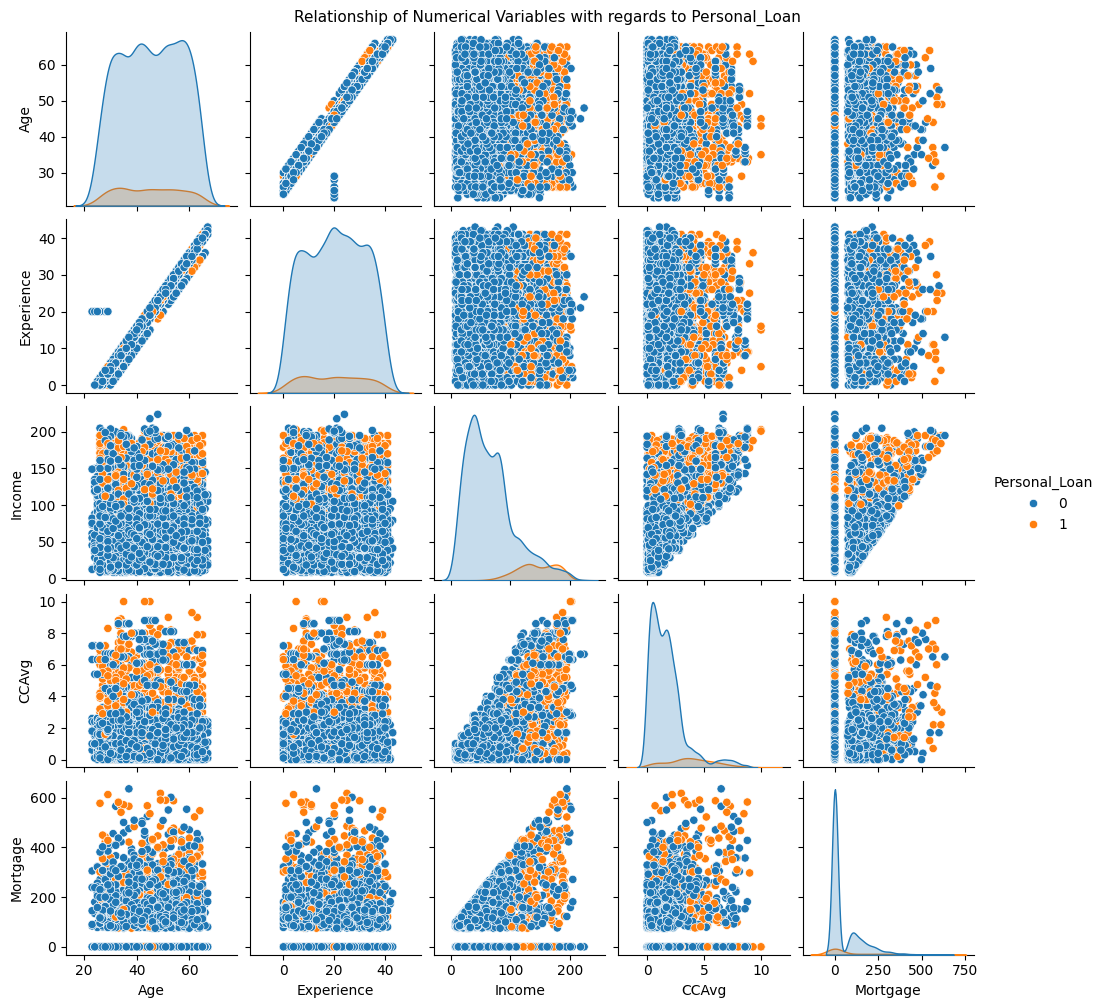

In [ ]:
# Display the relationships of Numerical Variables with regards to Personal_Loan
show_pairplot(data = df[num_cols + ['Personal_Loan']], hue = 'Personal_Loan')

**Observations:**
* The orange spots are the customers who accepted a loan while the blue spots are the customers who did not accept a loan.
* Age and Experience shows a strong positive correlation (0.98 correlation).
* Income and CCAvg is higher for customers who accepted a loan.
* The rest of the numerical columns shows small correlation. This needs more investigation.

##### Observations on Age:

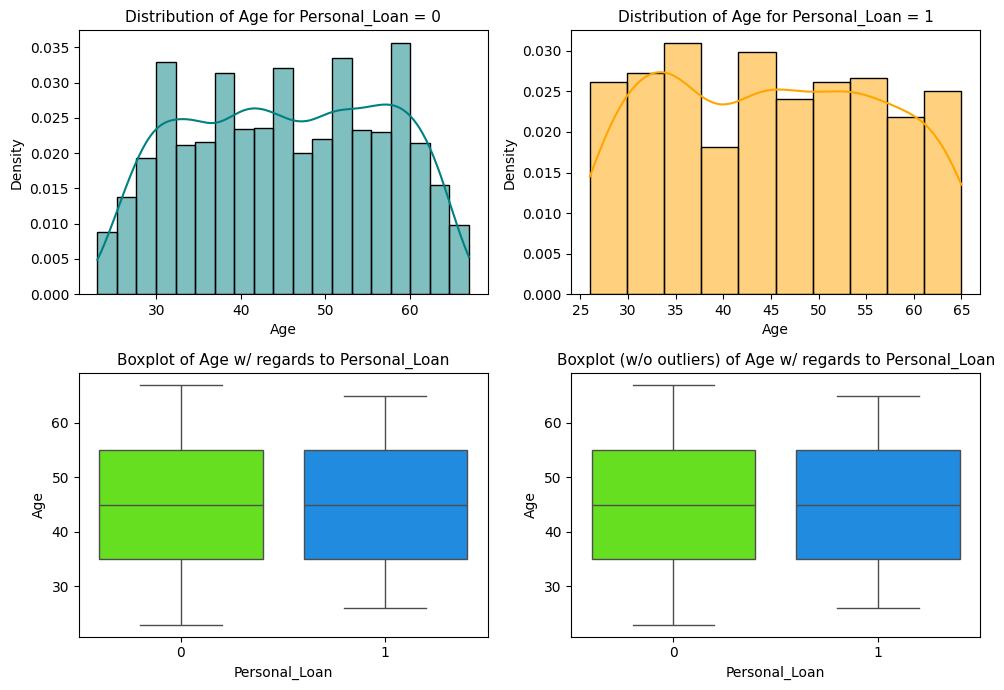

In [ ]:
# Display the distribution of Age with regards to Personal_Loan
show_distplot_boxplot(data = df, feature = 'Age', target = 'Personal_Loan')

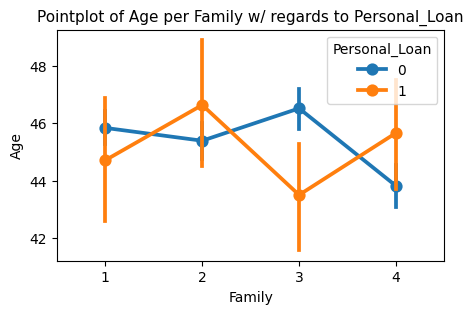

In [ ]:
# Display the distribution of Age per Family with regards to Personal_Loan
show_pointplot(data = df, feature = 'Age', category = 'Family', target = 'Personal_Loan')

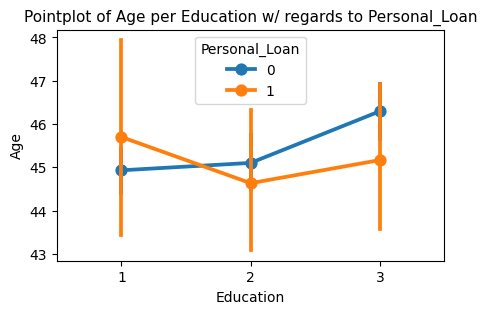

In [ ]:
# Display the distribution of Age per Education with regards to Personal_Loan
show_pointplot(data = df, feature = 'Age', category = 'Education', target = 'Personal_Loan')

**Observations:**
* Age shows that majority of customers who accepted a loan do not have a significant difference in age compared to those who have not accepted a loan.
* Age shows more customers accept a loan when they are within 33 to 53 years of age.
* The median age is close to 45 years old regardless if the customer have accepted a loan or not.

##### Observations on Experience:

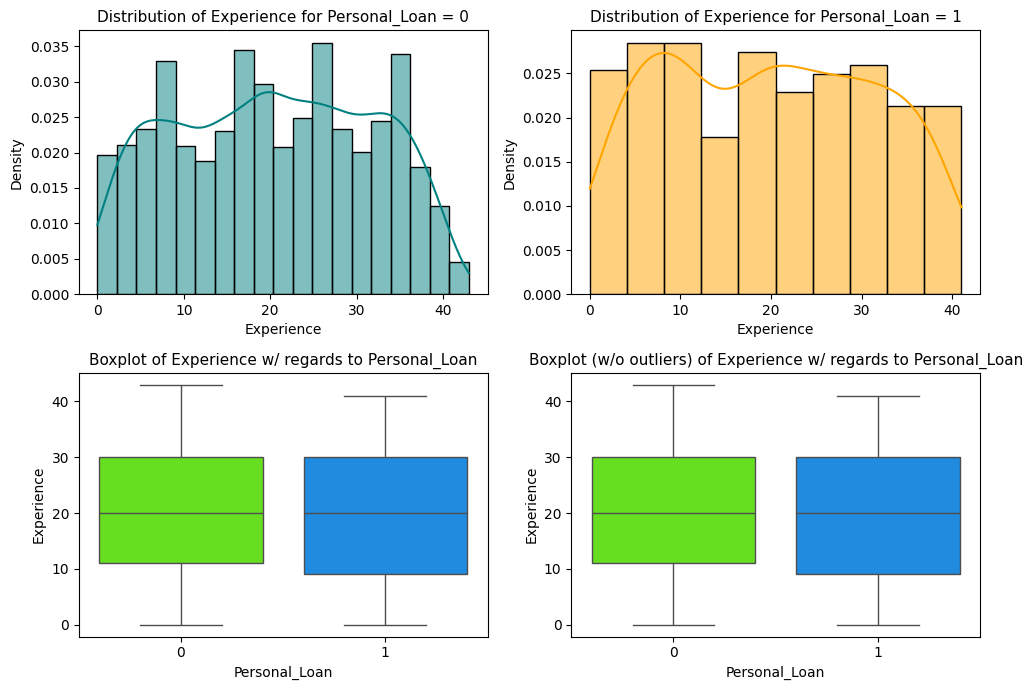

In [ ]:
# Display the distribution of Experience with regards to Personal_Loan
show_distplot_boxplot(data = df, feature = 'Experience', target = 'Personal_Loan')

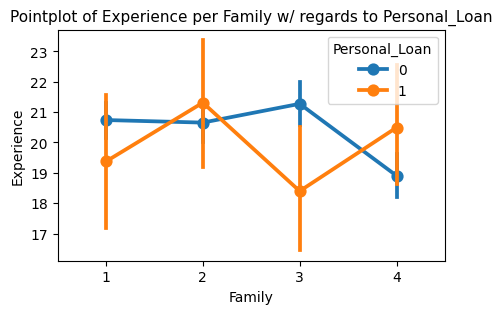

In [ ]:
# Display the distribution of Experience per Family with regards to Personal_Loan
show_pointplot(data = df, feature = 'Experience', category = 'Family', target = 'Personal_Loan')

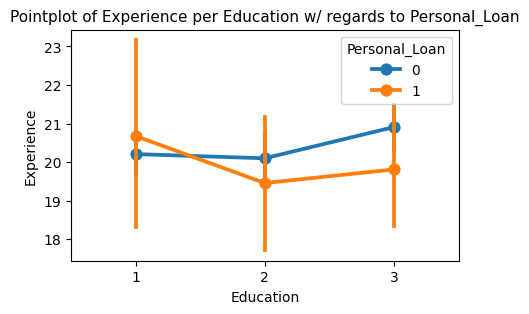

In [ ]:
# Display the distribution of Experience per Education with regards to Personal_Loan
show_pointplot(data = df, feature = 'Experience', category = 'Education', target = 'Personal_Loan')

**Observations:**
* Experience shows that majority of customers who accepted a loan do not have a significant difference in experience compared to those who have not accepted a loan.
* Experience shows more customers accept a loan when they have 8 to 33 years of professional experience.
* The median experience is close to 20 years regardless if the customer have accepted a loan or not.

##### Observations on Income:

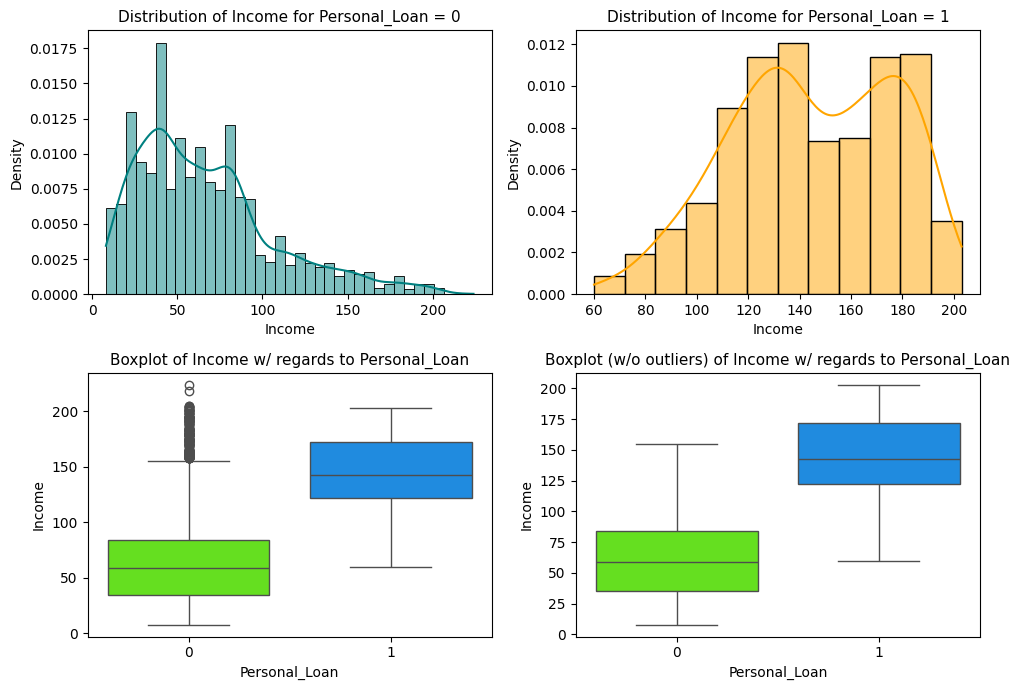

In [ ]:
# Display the distribution of Income with regards to Personal_Loan
show_distplot_boxplot(data = df, feature = 'Income', target = 'Personal_Loan')

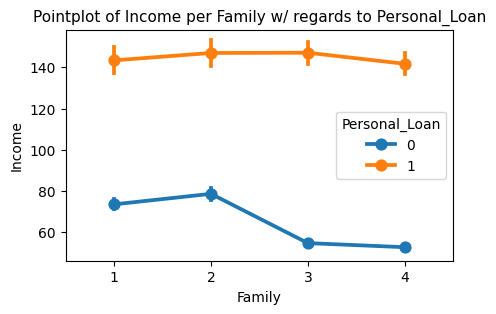

In [ ]:
# Display the distribution of Income per Family with regards to Personal_Loan
show_pointplot(data = df, feature = 'Income', category = 'Family', target = 'Personal_Loan')

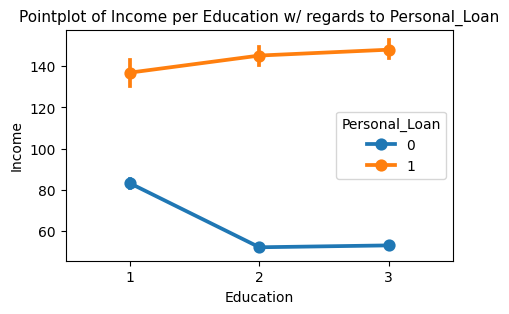

In [ ]:
# Display the distribution of Income per Education with regards to Personal_Loan
show_pointplot(data = df, feature = 'Income', category = 'Education', target = 'Personal_Loan')

**Observations:**
* Income shows that majority of customers who accepted a loan do have significantly higher income compared to those who have not accepted a loan.
* Income shows more customers accept a loan when they are within \$130K to \$180K annual income.
* The median income is close to \$145K for those who have accepted a loan.
* The median income is close to \$60K for those who have not accepted a loan.

##### Observations on CCAvg:

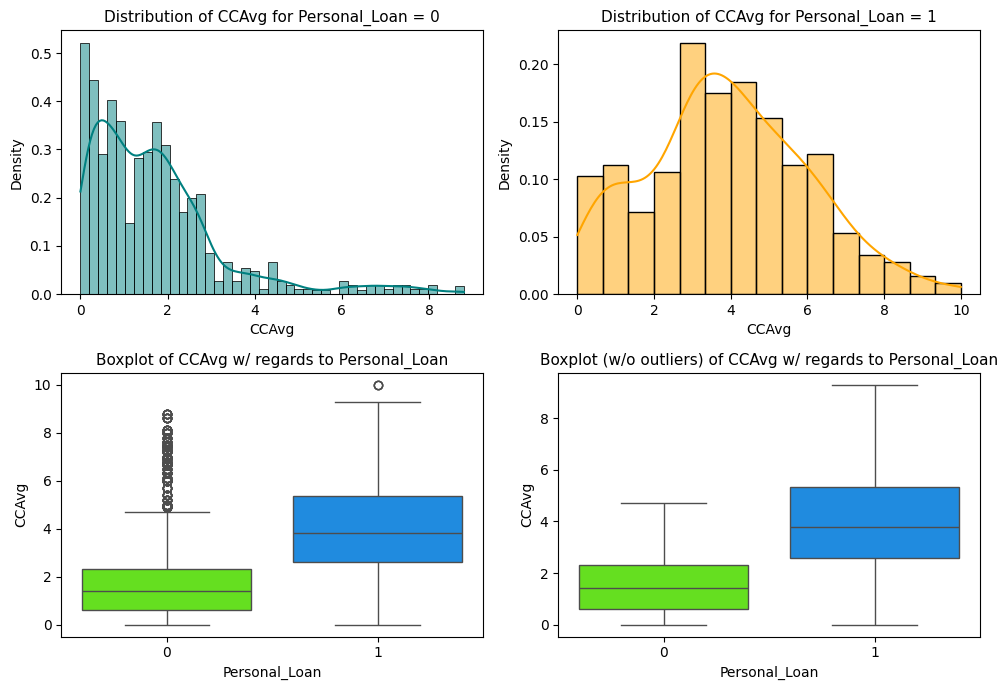

In [ ]:
# Display the distribution of CCAvg with regards to Personal_Loan
show_distplot_boxplot(data = df, feature = 'CCAvg', target = 'Personal_Loan')

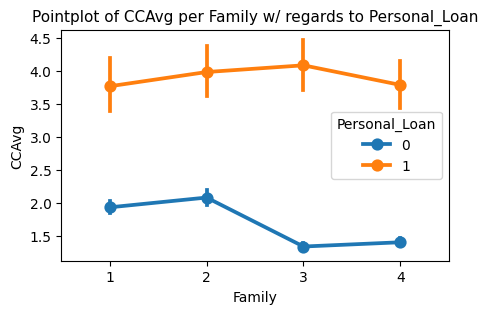

In [ ]:
# Display the distribution of CCAvg per Family with regards to Personal_Loan
show_pointplot(data = df, feature = 'CCAvg', category = 'Family', target = 'Personal_Loan')

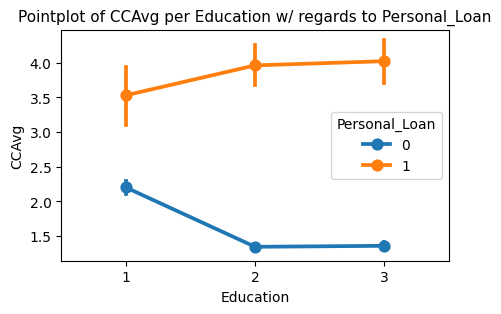

In [ ]:
# Display the distribution of CCAvg per Education with regards to Personal_Loan
show_pointplot(data = df, feature = 'CCAvg', category = 'Education', target = 'Personal_Loan')

In [ ]:
# Check if CCAvg only accounts for AllLife bank credit card and not the credit card issued by other banks
df[(df['CCAvg'] == 0) & (df['CreditCard'] == 1)]['ID'].count() > 0

True

In [ ]:
# Display the list of customers that do not use the AllLife Bank credit card
id_ccavg = df[df['CCAvg'] == 0]['ID']

id_ccavg

63        64
128      129
198      199
210      211
215      216
        ... 
4801    4802
4826    4827
4837    4838
4910    4911
4949    4950
Name: ID, Length: 106, dtype: int64

In [ ]:
# Display the list of customers that uses the credit card issued by other banks
id_cc1 = df[df['CreditCard'] == 1]['ID']

id_cc1

4          5
7          8
15        16
19        20
24        25
        ... 
4984    4985
4988    4989
4990    4991
4991    4992
4999    5000
Name: ID, Length: 1470, dtype: int64

In [ ]:
# Check if all customers that do not use the AllLife bank credit card are using the credit card issued by other banks
id_ccavg.isin(id_cc1).count() == id_ccavg.count()

True

In [ ]:
# Display the number of customers that have a credit card (both AllLife bank and other banks)
df[(df['CCAvg'] > 0) | (df['CreditCard'] == 1)]['ID'].count()

4922

**Observations:**
* CCAvg shows that majority of customers who accepted a loan do have significantly higher credit card average spending compared to those who have not accepted a loan.
* CCAvg shows more customers accept a loan when they are within \$3K to \$5K average monthly spent.
* The median credit card average spending is close to \$3.5K for those who have accepted a loan.
* The median credit card average spending is close to \$1.5K for those who have not accepted a loan.
* CCAvg and CreditCard shows that all 106 customers that do not use the AllLife bank credit card (CCAvg = 0) are using the credit card issued by other banks (CreditCard = 1). There is no specific record that confirms how many customers own a credit card. However, given the available data (CCAvg and CreditCard), it shows that there are 4,922 customers that own a credit card (assuming that all customers that own an AllLife bank credit card have more than 0$ credit card average spending or they are using the credit card issued by other banks, i.e. CCAvg > 0 or CreditCard = 1).


##### Observations on Mortgage:

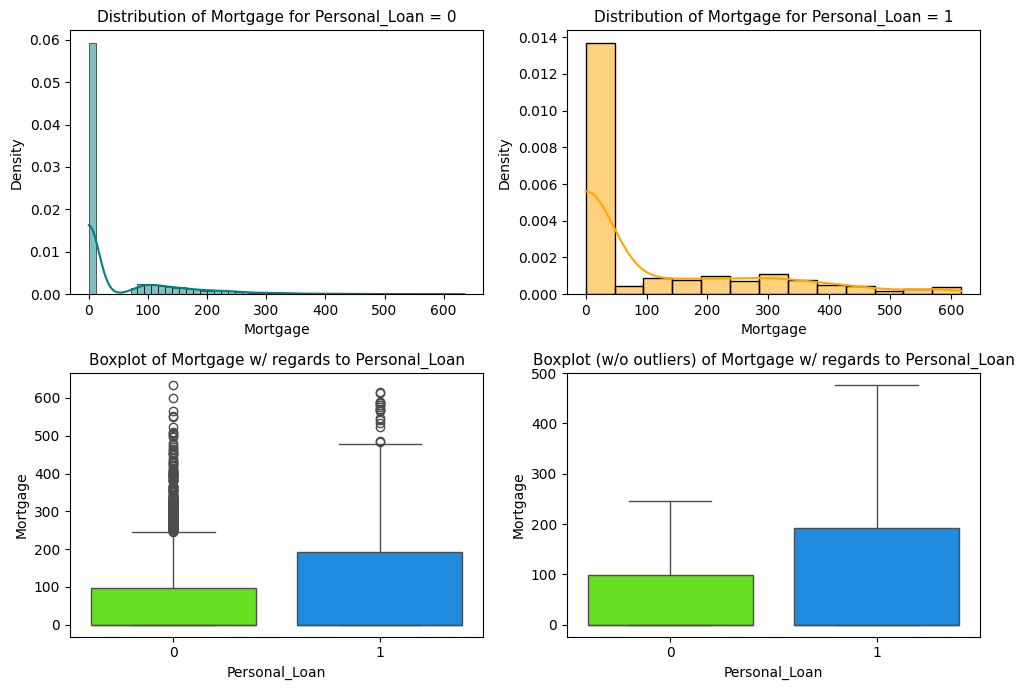

In [ ]:
# Display the distribution of Mortgage with regards to Personal_Loan
show_distplot_boxplot(data = df, feature = 'Mortgage', target = 'Personal_Loan')

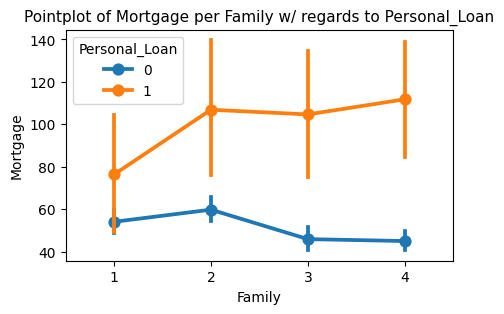

In [ ]:
# Display the distribution of Mortgage per Family with regards to Personal_Loan
show_pointplot(data = df, feature = 'Mortgage', category = 'Family', target = 'Personal_Loan')

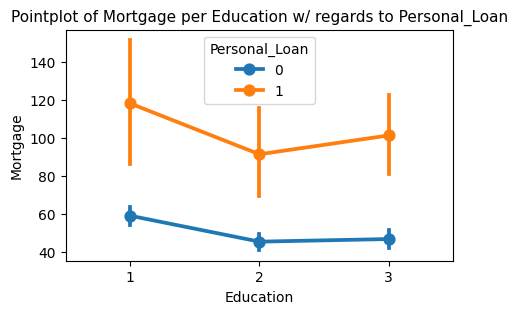

In [ ]:
# Display the distribution of Mortgage per Education with regards to Personal_Loan
show_pointplot(data = df, feature = 'Mortgage', category = 'Education', target = 'Personal_Loan')

**Observations:**
* Mortgage shows that majority of customers who accepted a loan do have significantly higher mortgage compared to those who have not accepted a loan.
* The median mortgage is close to \$0 regardless if the customer have accepted a loan or not.

##### Observations on ZIPCode/ City_State):

Personal_Loan,0,1,All
City_State_ZIPCode,,,
"Berkeley, CA 94720",150,19,169
"Claremont, CA 91711",48,4,52
"Davis, CA 95616",110,6,116
"El Segundo, CA 90245",45,5,50
"Emeryville, CA 94608",33,1,34
"La Jolla, CA 92037",49,5,54
"La Jolla, CA 92093",42,9,51
"Los Angeles, CA 90024",49,1,50
"Los Angeles, CA 90089",38,8,46


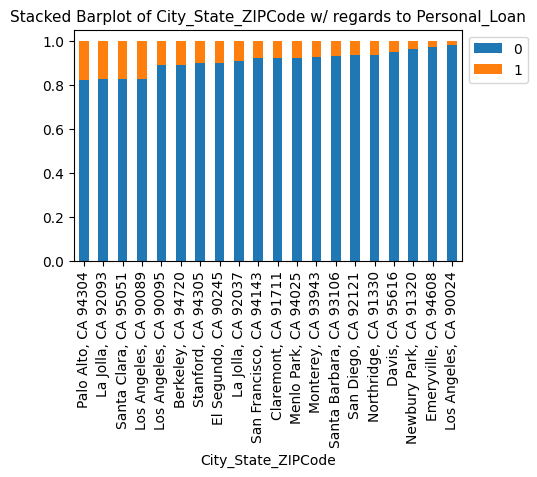

In [ ]:
# Display the distribution of ZIPCode with regards to Personal_Loan (filtered to top 20)
show_stackedbarplot(data = df[df['City_State_ZIPCode'].isin(df['City_State_ZIPCode'].value_counts().head(20).index)], feature = 'City_State_ZIPCode', target = 'Personal_Loan')

Personal_Loan,0,1,All
City_State,,,
"Berkeley, CA",214,27,241
"Claremont, CA",48,4,52
"Davis, CA",115,6,121
"Irvine, CA",50,8,58
"La Jolla, CA",97,15,112
"Los Angeles, CA",337,38,375
"Menlo Park, CA",48,4,52
"Monterey, CA",66,6,72
"Newbury Park, CA",51,2,53


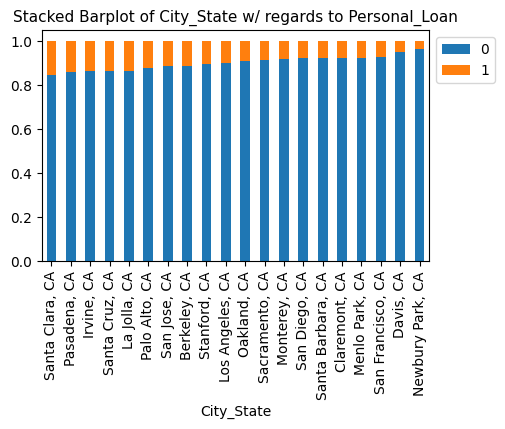

In [ ]:
# Display the distribution of City_State with regards to Personal_Loan (filtered to top 20)
show_stackedbarplot(data = df[df['City_State'].isin(df['City_State'].value_counts().head(20).index)], feature = 'City_State', target = 'Personal_Loan')

**Observations:**
* City_State_ZIPCode shows higher percentage of customers accept a loan when they reside from 94304 - Palo Alto, CA (with 17.78%). List is followed by:
  * 92093 - La Jolla, CA (with 17.65%)
  * 95051 - Santa Clara, CA (with 17.65%)
  * 90089 - Los Angeles, CA(with 17.39%)
  * 90095 - Los Angeles, CA(with 11.27%)
  * 94720 - Berkeley, CA (with 11.24%)
  * 94305 - Stanford, CA (with 10.24%)
  * 90245 - El Segundo, CA (with 10.00%)
  * 92037 - La Jolla, CA (with 9.26%)
  * 94143 - San Francisco, CA (with 8.11%)
  * 91711 - Claremont, CA (with 7.69%)
  * 94025 - Menlo Park, CA (with 7.69%)
  * 93943 - Monterey, CA (with 7.41%)
  * 93106 - Santa Barbara, CA (with 7.02%)
  * 92121 - San Diego, CA (with 6.67%)
  * 91330 - Northridge, CA (with 6.52%)
  * 95616 - Davis, CA (with 5.17%)
  * 91320 - Newburry Park, CA (with 3.77%)
  * 94608 - Emeryville, CA (with 2.94%)
  * 90024 - Los Angeles, CA (with 2.00%)
* City_State shows higher percentage of customers accept a loan when they reside from Santa Clara, CA (with 15.58%). List is followed by:
  * Pasedena, CA (with 14.08%)
  * Irvine, CA (with 13.79%)
  * Santa Cruz, CA (with 13.73%)
  * La Jolla, CA (with 13.39%)
  * Palo Alto, CA (with 12.31%)
  * San Jose, CA (with 11.46%)
  * Berkeley, CA (with 11.20%)
  * Stanford, CA (with 10.24%)
  * Los Angeles, CA (with 10.13%)
  * Oakland, CA (with 9.09%)
  * Sacramento, CA (with 8.78%)
  * Monterey, CA (with 8.33%)
  * San Diego, CA (with 7.81%)
  * Santa Barbara, CA (with 7.77%)
  * Claremont, CA (with 7.69%)
  * Menlo Park, CA (with 7.69%)
  * San Francisco, CA (with 7.39%)
  * Davis, CA (with 4.96%)
  * Newburry Park, CA (with 3.77%)
* The top 20 ZIP codes and top 20 Cities all belong to the State of California.


##### Observations on Family:

Personal_Loan,0,1,All
Family,,,
1,1365,107,1472
2,1190,106,1296
3,877,133,1010
4,1088,134,1222
All,4520,480,5000


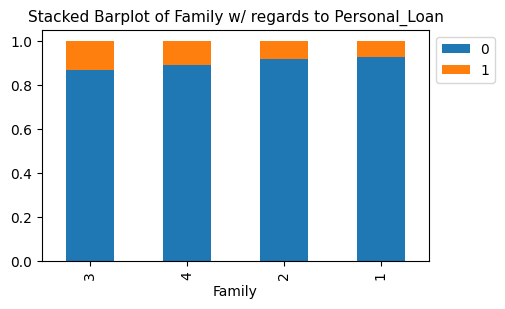

In [ ]:
# Display the distribution of Family with regards to Personal_Loan
show_stackedbarplot(data = df, feature = 'Family', target = 'Personal_Loan')

**Observations:**
* Family shows that majority of customers who accepted a loan do have more family members compared to those who have not accepted a loan.
* Family shows higher percentage of customers accept a loan when their family size is 3 (with 13.17%). List is followed by:
  * Family size of 4 (with 10.97%)
  * Family size of 2 (with 8.18%)
  * Family size of 2 (with 7.27%)

##### Observations on Education:

Personal_Loan,0,1,All
Education,,,
1,2003,93,2096
2,1221,182,1403
3,1296,205,1501
All,4520,480,5000


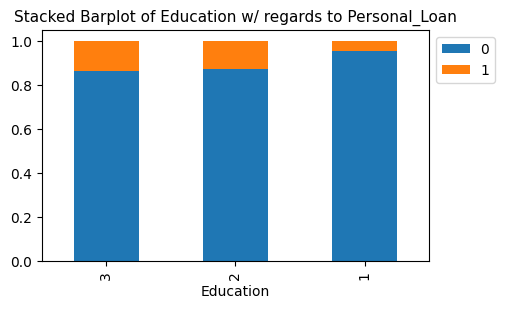

In [ ]:
# Display the distribution of Education with regards to Personal_Loan
show_stackedbarplot(data = df, feature = 'Education', target = 'Personal_Loan')

**Observations:**
* Education shows that majority of customers who accepted a loan do have higher education level compared to those who have not accepted a loan.
* Education shows higher percentage of customers accept a loan when they have education level 3 - Advanced/ Professional (with 13.66%). List is followed by:
  * Educational level 2 - Graduate (with 12.97%)
  * Educational level 1 - Undergraduate (with 4.44%)

##### Observations on Securities_Account:

Personal_Loan,0,1,All
Securities_Account,,,
0,4058,420,4478
1,462,60,522
All,4520,480,5000


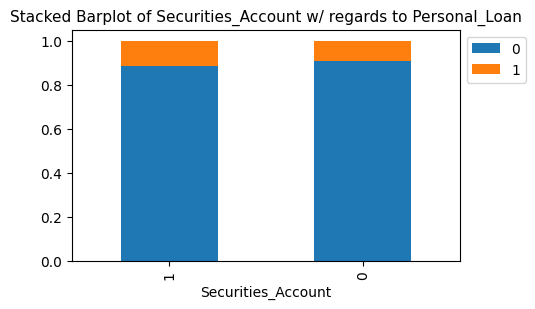

In [ ]:
# Display the distribution of Securities_Account with regards to Personal_Loan
show_stackedbarplot(data = df, feature = 'Securities_Account', target = 'Personal_Loan')

**Observations:**
* Securities_Account shows higher percentage of customers accept a loan when they do have securities account (with 11.49%) compared to customers that do not have securities account (with 9.38%).


##### Observations on CD_Account:

Personal_Loan,0,1,All
CD_Account,,,
0,4358,340,4698
1,162,140,302
All,4520,480,5000


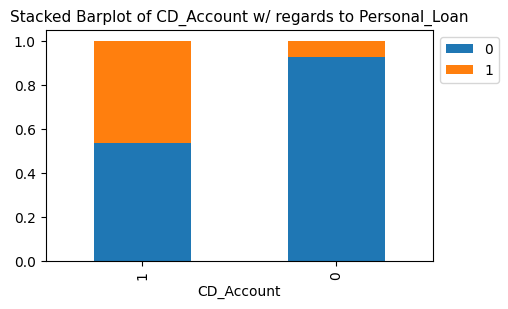

In [ ]:
# Display the distribution of CD_Account with regards to Personal_Loan
show_stackedbarplot(data = df, feature = 'CD_Account', target = 'Personal_Loan')

**Observations:**
* CD_Account shows higher percentage of customers accept a loan when they do have certificate of deposit account (with 46.36%) compared to customers that do not have certificate of deposit account (with 7.24%).



##### Observations on Online:

Personal_Loan,0,1,All
Online,,,
0,1827,189,2016
1,2693,291,2984
All,4520,480,5000


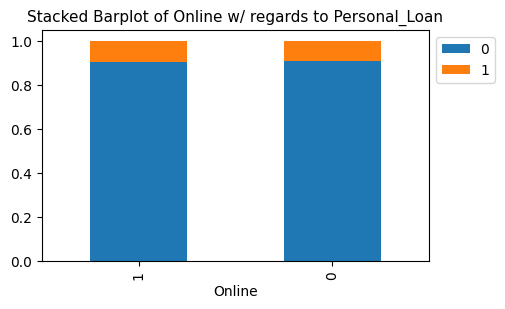

In [ ]:
# Display the distribution of Online with regards to Personal_Loan
show_stackedbarplot(data = df, feature = 'Online', target = 'Personal_Loan')

**Observations:**
* Online shows higher percentage of customers accept a loan when they use the online banking facilities (with 9.75%) compared to customers that do not use the online banking facilities (with 9.38%).




##### Observations on CreditCard:

Personal_Loan,0,1,All
CreditCard,,,
0,3193,337,3530
1,1327,143,1470
All,4520,480,5000


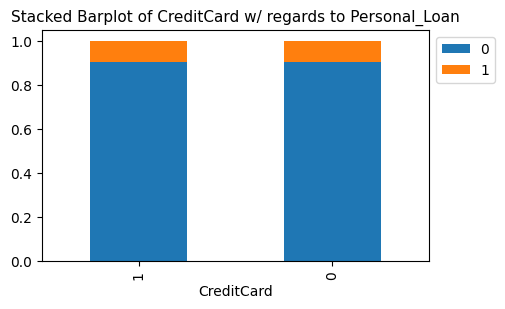

In [ ]:
# Display the distribution of CreditCard with regards to Personal_Loan
show_stackedbarplot(data = df, feature = 'CreditCard', target = 'Personal_Loan')

**Observations:**
* CreditCard shows higher percentage of customers accept a loan when they use the credit card issued by other banks (with 9.73%) compared to customers that do not use the credit card issued by other banks (with 9.55%).

##### Observations on Chi-Square Test:

In [ ]:
# Display the significance of each feature with regards to Personal_Loan
show_significance(data = df, target = 'Personal_Loan')

  ID score has no effect on Personal_Loan as the p_value 0.493 >= significance_level 0.05
  Age score has no effect on Personal_Loan as the p_value 0.12 >= significance_level 0.05
  Experience score has no effect on Personal_Loan as the p_value 0.817 >= significance_level 0.05
* Income score has an effect on Personal_Loan as the p_value 0.0 < significance_level 0.05
  ZIPCode score has no effect on Personal_Loan as the p_value 0.76 >= significance_level 0.05
* Family score has an effect on Personal_Loan as the p_value 0.0 < significance_level 0.05
* CCAvg score has an effect on Personal_Loan as the p_value 0.0 < significance_level 0.05
* Education score has an effect on Personal_Loan as the p_value 0.0 < significance_level 0.05
* Mortgage score has an effect on Personal_Loan as the p_value 0.0 < significance_level 0.05
  Securities_Account score has no effect on Personal_Loan as the p_value 0.141 >= significance_level 0.05
* CD_Account score has an effect on Personal_Loan as the p_valu

**Observations:**
* Income, Family, CCAvg, Education, Mortgage and CD_Account (marked with *) shows they have significant correlation with Personal_Loan using the Chi-Square test. Their significance were also visible during observations and visualizations.
* All other columns shows they have no significant correlation with Personal_Loan.

### Key Observations on Exploratory Data Analysis

In [ ]:
# Display the statistical summary of all columns for those who accepted a loan
df[df['Personal_Loan'] == 1].describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,480.00000,NaN,NaN,NaN,2390.65000,1394.39367,10.00000,1166.50000,2342.00000,3566.00000,4981.00000
Age,480.00000,NaN,NaN,NaN,45.06667,11.59096,26.00000,35.00000,45.00000,55.00000,65.00000
Experience,480.00000,NaN,NaN,NaN,19.84375,11.58244,0.00000,9.00000,20.00000,30.00000,41.00000
Income,480.00000,NaN,NaN,NaN,144.74583,31.58443,60.00000,122.00000,142.50000,172.00000,203.00000
ZIPCode,480.00000,NaN,NaN,NaN,93153.20208,1759.22375,90016.00000,91908.75000,93407.00000,94705.50000,96008.00000
Family,480.00000,NaN,NaN,NaN,2.61250,1.11539,1.00000,2.00000,3.00000,4.00000,4.00000
CCAvg,480.00000,NaN,NaN,NaN,3.90535,2.09768,0.00000,2.60000,3.80000,5.34750,10.00000
Education,480.00000,NaN,NaN,NaN,2.23333,0.75337,1.00000,2.00000,2.00000,3.00000,3.00000
Mortgage,480.00000,NaN,NaN,NaN,100.84583,160.84786,0.00000,0.00000,0.00000,192.50000,617.00000
Personal_Loan,480.00000,NaN,NaN,NaN,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [ ]:
# Display the statistical summary of all columns for those who did not accept a loan
df[df['Personal_Loan'] == 0].describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4520.00000,NaN,NaN,NaN,2512.16549,1448.29933,1.00000,1259.75000,2518.50000,3768.25000,5000.00000
Age,4520.00000,NaN,NaN,NaN,45.36726,11.45043,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,4520.00000,NaN,NaN,NaN,20.37898,11.21758,0.00000,11.00000,20.00000,30.00000,43.00000
Income,4520.00000,NaN,NaN,NaN,66.23739,40.57853,8.00000,35.00000,59.00000,84.00000,224.00000
ZIPCode,4520.00000,NaN,NaN,NaN,93170.96195,1759.66566,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,4520.00000,NaN,NaN,NaN,2.37345,1.14877,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,4520.00000,NaN,NaN,NaN,1.72901,1.56765,0.00000,0.60000,1.40000,2.30000,8.80000
Education,4520.00000,NaN,NaN,NaN,1.84358,0.83997,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,4520.00000,NaN,NaN,NaN,51.78938,92.03893,0.00000,0.00000,0.00000,98.00000,635.00000
Personal_Loan,4520.00000,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


* As observed during visualizations and in Chi-Square test, Income, Family, CCAvg, Education, Mortgage and CD_Account shows significant correlation to Personal_Loan.
* Income shows that majority of customers who accepted a loan do have significantly higher income (mean value close to \$145K) compared to those who have not accepted a loan (mean value close to \$65K).
* CCAvg shows that majority of customers who accepted a loan do have significantly higher credit card average spending (mean value close to \$4K) compared to those who have not accepted a loan (mean value close to \$1.5K).
* Family shows that majority of customers who accepted a loan do have more family members (mean value close to 2.6) compared to those who have not accepted a loan (mean value close to 2.3).
* Education shows that majority of customers who accepted a loan do have higher education level (mean value close to 2.2) compared to those who have not accepted a loan (mean value close to 1.8).
* Mortgage shows that majority of customers who accepted a loan do have significantly higher mortgage (mean value close to \$100K) compared to those who have not accepted a loan (mean value close to \$50K).
* CD_Account shows higher percentage of customers accept a loan when they do have certificate of deposit account (with 46.36%) compared to customers that do not have certificate of deposit account (with 7.24%).
* Age and Experience have a very high correlation (0.98).
* Age shows that more customers accept a loan when they are between 33 to 53 years of age (with mean age close to 45 years old).
* Experience shows that more customers accept a loan when they have 8 to 33 years of professional experience (with mean experience close to 20 years).
* There are 4,894 (97.88%) customers that uses the AllLife bank credit card. While 3,530 (70.60%) of the customers have not used the credit cards issued by other banks.
* CCAvg and CreditCard shows that all 106 customers that do not use the AllLife bank credit card (CCAvg = 0) are using the credit card issued by other banks (CreditCard = 1). There is no specific record that confirms how many customers own a credit card. However, given the available data (CCAvg and CreditCard), it shows that there are 4,922 customers that own a credit card (assuming that all customers that own an AllLife bank credit card have more than 0$ credit card average spending or they are using the credit card issued by other banks, i.e. CCAvg > 0 or CreditCard = 1).
* Income, CCAvg and Mortgage has plenty of outliers.
* City_State shows higher percentage of customers accept a loan when they reside from Santa Clara, CA (with 15.58%). List is followed by:
  * Pasedena, CA (with 14.08%)
  * Irvine, CA (with 13.79%)
  * Santa Cruz, CA (with 13.73%)
  * La Jolla, CA (with 13.39%)
  * Palo Alto, CA (with 12.31%)
  * San Jose, CA (with 11.46%)
  * Berkeley, CA (with 11.20%)
  * Stanford, CA (with 10.24%)
  * Los Angeles, CA (with 10.13%)
  * Oakland, CA (with 9.09%)
  * Sacramento, CA (with 8.78%)
  * Monterey, CA (with 8.33%)
  * San Diego, CA (with 7.81%)
  * Santa Barbara, CA (with 7.77%)
  * Claremont, CA (with 7.69%)
  * Menlo Park, CA (with 7.69%)
  * San Francisco, CA (with 7.39%)
  * Davis, CA (with 4.96%)
  * Newburry Park, CA (with 3.77%)

## Data Preprocessing

### Function Definition

In [ ]:
# User-defined functions
def show_boxplot_outliers(data, num_cols, figsize = (10, 10)):
  '''
  Description: Function to plot multiple boxplot to display the outliers
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    num_cols: list, required
      The column names of numeric columns
    figsize: tuple, optional
      The figure size in inches, default: (10, 10)
  '''
  plt.figure(figsize = figsize)

  for i, variable in enumerate(num_cols):
      plt.subplot(4, 4, i + 1)
      plt.boxplot(data[variable], whis = 1.5)
      plt.tight_layout()
      plt.title(variable)

  plt.show()

### Feature Engineering

In [ ]:
# Drop columns that are not needed in the model building
if 'ID' in df.dtypes:
  df.drop(['ID'], axis = 1, inplace = True)

if 'City_State' in df.dtypes:
  df.drop(['City_State'], axis = 1, inplace = True)

if 'City_State_ZIPCode' in df.dtypes:
  df.drop(['City_State_ZIPCode'], axis = 1, inplace = True)

df

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0


**Observations:**
* The column ID was dropped as it is not needed in the analysis and when building the model.
* The columns City_State and City_State_ZIPCode were dropped because they are object data type and cannot be used when building the model. The original column ZIPCode will be used instead.

### Outlier Detection

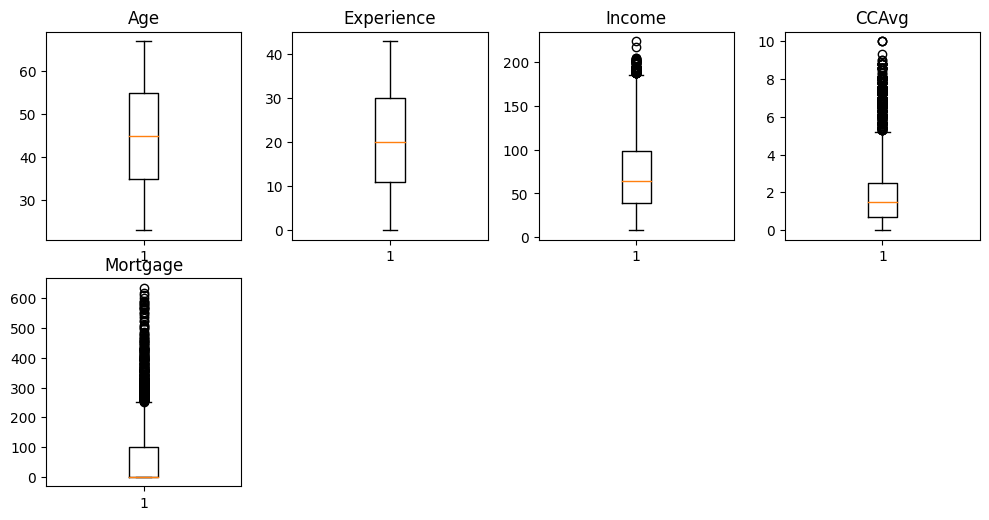

In [ ]:
# Display if there are outliers in the numerical columns
show_boxplot_outliers(data = df, num_cols = num_cols)

**Observations:**
* Income, CCAvg and Mortgage has plenty of outliers.
* These outliers will not be treated as they are considered valid values.

### Data Preparation

In [ ]:
# Create independent variable
x = df.drop(['Personal_Loan'], axis = 1)

x

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90000,3,0,0,0,1,0
4996,30,4,15,92037,4,0.40000,1,85,0,0,1,0
4997,63,39,24,93023,2,0.30000,3,0,0,0,0,0
4998,65,40,49,90034,3,0.50000,2,0,0,0,1,0


In [ ]:
# Create dependent variable
y = df['Personal_Loan']

y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: int64

In [ ]:
# Split train and test data
x_train, x_test, y_train, y_test = sms.train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
# Display the shape of train data
x_train.shape

(3500, 12)

In [ ]:
# Display the shape of test data
x_test.shape

(1500, 12)

In [ ]:
# Display the percentage of classes in train data
y_train.value_counts(normalize = True)

0   0.90543
1   0.09457
Name: Personal_Loan, dtype: float64

In [ ]:
# Display the percentage of classes in test data
y_test.value_counts(normalize = True)

0   0.90067
1   0.09933
Name: Personal_Loan, dtype: float64

**Observations:**
* The training set has a shape of 3,500 rows with 15 columns, while the testing set has a shape of 1,500 rows with 15 columns.
* It shows that close to 90% of observations belongs to class 0 (not take a loan) and less than 10% observations belongs to class 1 (take a loan), and this is preserved in the train and test sets.

## Model Building

### Function Definition

In [ ]:
# User-defined functions
def get_model_perf_class_sklearn(model, predictors, target):
  '''
  Description: Function to compute different metrics to check classification model performance
  Parameters:
    model: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    predictors: pandas.core.frame.DataFrame, required
      The DataFrame of the independent variables
    target: str, required
      The depedent variable
  '''
  # Predict using the independent variables
  pred = model.predict(predictors)

  # Compute accuracy
  acc = smt.accuracy_score(target, pred)

  # Compute recall
  recall = smt.recall_score(target, pred)

  # Compute precision
  precision = smt.precision_score(target, pred)

  # Compute F1-score
  f1 = smt.f1_score(target, pred)

  # Create a DataFrame of metrics
  df_perf = pd.DataFrame({'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1, }, index = [0],)

  return df_perf

def show_confusion_matrix_sklearn(model, predictors, target, figsize = (6, 4)):
  '''
  Description: Function to plot the confusion matrix with percentages
  Parameters:
    model: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    predictors: pandas.core.frame.DataFrame, required
      The DataFrame of the independent variables
    target: str, required
      The depedent variable
  '''
  # Predict using the independent variables
  y_pred = model.predict(predictors)

  # Create confusion matrix
  cm = smt.confusion_matrix(target, y_pred)
  labels = np.asarray(
    [
        ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
  ).reshape(2, 2)

  plt.figure(figsize = figsize)

  ax = sns.heatmap(cm, annot = labels, fmt = '')
  ax.set_title('Confusion Matrix', fontsize = 11)

  plt.ylabel('True label')
  plt.xlabel('Predicted label')

def show_feature_importance(importances, indices, feature_names):
  '''
  Description: Function to plot the features in the order of importance
  Parameters:
    importances: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    indices: numpy.ndarray, required
      The indices of array
    feature_names: list, required
      The column names of features
  '''
  plt.figure(figsize = (11.75, 5))
  plt.title('Feature Importances', fontsize = 11)
  plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

def show_decision_tree(decision_tree, feature_names, figsize = (20, 10)):
  '''
  Description: Function to plot the features in the order of importance
  Parameters:
    model: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    feature_names: list, required
      The column names of features
    figsize: tuple, optional
      The figure size in inches, default: (20, 10)
  '''
  plt.figure(figsize = figsize)
  plt.suptitle('Decision Tree', y = 0.9, size = 17)

  out = ste.plot_tree(
      decision_tree = decision_tree,
      feature_names = feature_names,
      filled = True,
      fontsize = 9,
      node_ids = False,
      class_names = None
  )

  # Display Decision Tree
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor('black')
          arrow.set_linewidth(1)

  plt.show()

### Model Evaluation Criterion

**Model can make wrong predictions as:**
1.   Predicting a customer will accept a loan, but in reality the customer would not accept a loan (False Negative).
2.   Predicting a customer will not accept a loan, but in reality the customer would have accepted a loan (False Positive).

**Which case is more important?**
 * Second case if more important (False Positive). The main goal of the campain is to identify customers to who will accept a loan.
 * If we predict that a customer will not accept a loan, but will actually accept a loan, it will be a loss of opportunity for the bank to increase its loan customers.
 * If we predict that a customer will accept a loan, but will not actually accept a loan, the bank will have to bear the cost of resources/ operations in identifying potential loan customers.

**How to reduce this loss (i.e. To reduce False Negatives)?**
*  Recall should be maximized, the greater the Recall, higher the chances of minimizing the False Negatives.

### Decision Tree (without class_weight)

##### Create Decision Tree model

In [ ]:
# Create Decision Tree model without class_weight
model_wo_class_weight = ste.DecisionTreeClassifier(random_state = 1)
model_wo_class_weight.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

##### Check model performance on training set

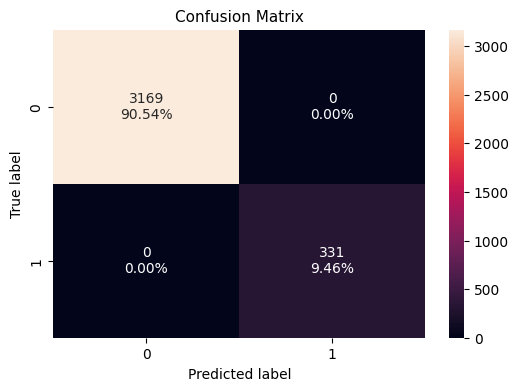

In [ ]:
# Display the confision matrix of train data without weight_class
show_confusion_matrix_sklearn(model = model_wo_class_weight, predictors = x_train, target = y_train)

In [ ]:
# Display the model performance of train data without weight_class
decision_tree_perf_train_wo_class_weight = get_model_perf_class_sklearn(model = model_wo_class_weight, predictors = x_train, target = y_train)

decision_tree_perf_train_wo_class_weight

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


##### Check model performance on testing set

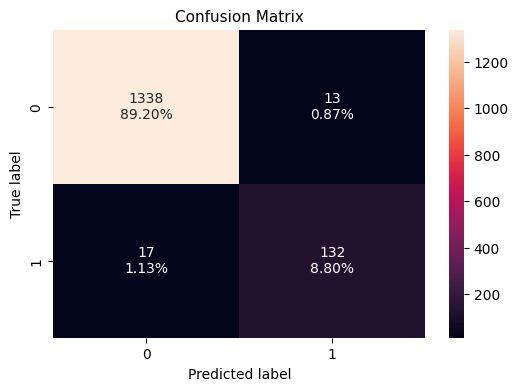

In [ ]:
# Display the confision matrix of test data without weight_class
show_confusion_matrix_sklearn(model = model_wo_class_weight, predictors = x_test, target = y_test)

In [ ]:
# Display the model performance of test data without weight_class
decision_tree_perf_test_wo_class_weight = get_model_perf_class_sklearn(model = model_wo_class_weight, predictors = x_test, target = y_test)

decision_tree_perf_test_wo_class_weight

,Accuracy,Recall,Precision,F1
0,0.98000,0.88591,0.91034,0.89796


##### Observations on Decision Tree model (without class_weight)

* Both training and testing sets have less than 10% positive classes. This shows that accuracy is not a good metric to evaluate this model.
* The performance of the model shows a big disparity between the training and testing sets which indicates that the model is overfitting.
* The accuracy, recall, precision and F1 score has a value of 1.0 for the training set which also indicates that the model is overfitting.
* The hyperparameter class_weight can be utilized to adjust the weighting calculations of the model.

### Decision Tree (with class_weight)

##### Create Decision Tree model

* If the frequency of class 1 is 10% and the frequency of class 0 is 90%, then class 0 will become the dominant class and the Decision Tree will be more biased toward the dominant classes.
* In this case, we will set the following Hyperparameter in the DecisionTreeClassifier. This will automatically adjust the weights to be inversely proportional to the class frequencies in the input data:
  * class_weight = balanced

In [ ]:
# Create Decision Tree model with class_weight
model_w_class_weight = ste.DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
model_w_class_weight.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

##### Check model performance on training set

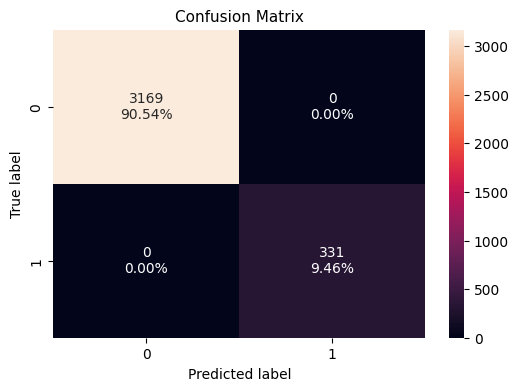

In [ ]:
# Display the confision matrix of train data with weight_class
show_confusion_matrix_sklearn(model = model_w_class_weight, predictors = x_train, target = y_train)

In [ ]:
# Display the model performance of train data with weight_class
decision_tree_perf_train_w_class_weight = get_model_perf_class_sklearn(model = model_w_class_weight, predictors = x_train, target = y_train)

decision_tree_perf_train_w_class_weight

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


##### Check model performance on testing set

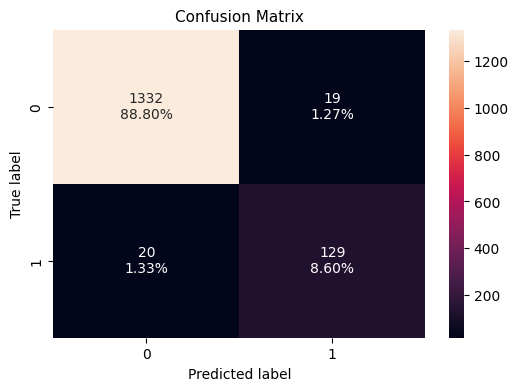

In [ ]:
# Display the confision matrix of test data with weight_class
show_confusion_matrix_sklearn(model = model_w_class_weight, predictors = x_test, target = y_test)

In [ ]:
# Display the model performance of test data with weight_class
decision_tree_perf_test_w_class_weight = get_model_perf_class_sklearn(model = model_w_class_weight, predictors = x_test, target = y_test)

decision_tree_perf_test_w_class_weight

,Accuracy,Recall,Precision,F1
0,0.97400,0.86577,0.87162,0.86869


##### Observations on Decision Tree model (with class_weight)

* The performance of the model still shows a big difference between the training and testing sets which indicates that the model is still overfitting.
* The accuracy, recall, precision and F1 score still has a value of 1.0 for the training set which indicates that the model is still overfitting.
* Using the hyperparameter class_weight = 'balanced' did not improve the performance of the model. Thus, it needs more analysis and experimentation such as Hyperparameter tuning.

### Decision Tree (Pre-pruning)

##### Create Decision Tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the Hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e. we will use GridSearchCV.
* GridSearchCV is a tuning technique that attempts to compute the optimum values of Hyperparameters.
* It performs an exhaustive search on specific parameter values of a model.
* The parameters of the estimator/ model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Create Decision Tree model with pre-pruning
model_pre_prune = ste.DecisionTreeClassifier(random_state = 1)

# Define hyperparameters
parameters = {
  'class_weight': [{0: 0.15, 1: 0.85}],
  'max_depth': [np.arange(1, 15), None],
  'max_leaf_nodes': [50, 75, 150, 250],
  'min_samples_split': [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = smt.make_scorer(smt.recall_score)

# Run the grid search
grid_obj = sms.GridSearchCV(model_pre_prune, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the model to the best combination of parameters
model_pre_prune = grid_obj.best_estimator_

# Fit the best algorithm to the data
model_pre_prune.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_leaf_nodes=50,
                       min_samples_split=50, random_state=1)

##### Check model performance on training set

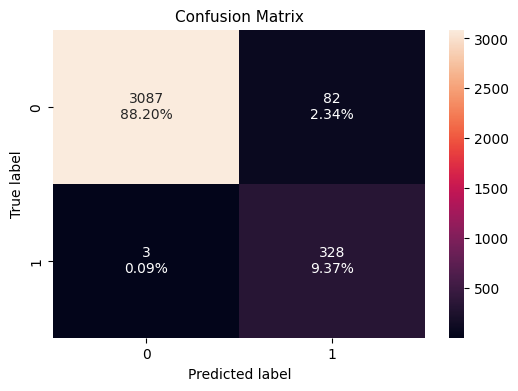

In [ ]:
# Display the confision matrix of train data with pre-pruning
show_confusion_matrix_sklearn(model = model_pre_prune, predictors = x_train, target = y_train)

In [ ]:
# Display the model performance of train data with pre-pruning
decision_tree_perf_train_pre_prune = get_model_perf_class_sklearn(model = model_pre_prune, predictors = x_train, target = y_train)

decision_tree_perf_train_pre_prune

,Accuracy,Recall,Precision,F1
0,0.97571,0.99094,0.80000,0.88529


##### Check model performance on testing set

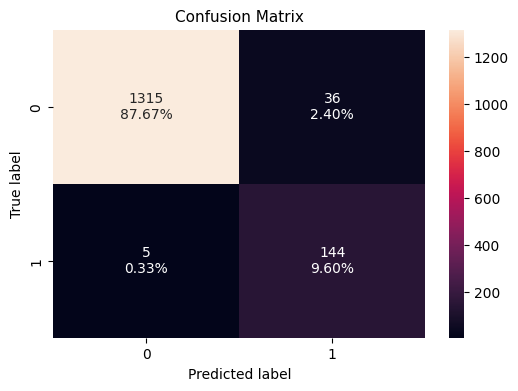

In [ ]:
# Display the confision matrix of test data with pre-pruning
show_confusion_matrix_sklearn(model = model_pre_prune, predictors = x_test, target = y_test)

In [ ]:
# Display the model performance of test data with pre-pruning
decision_tree_perf_test_pre_prune = get_model_perf_class_sklearn(model = model_pre_prune, predictors = x_test, target = y_test)

decision_tree_perf_test_pre_prune

,Accuracy,Recall,Precision,F1
0,0.97267,0.96644,0.80000,0.87538


##### Visualizing the Decision Tree

In [ ]:
# Create list of columns for pruning
feature_names = list(x_train.columns)

feature_names

['Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

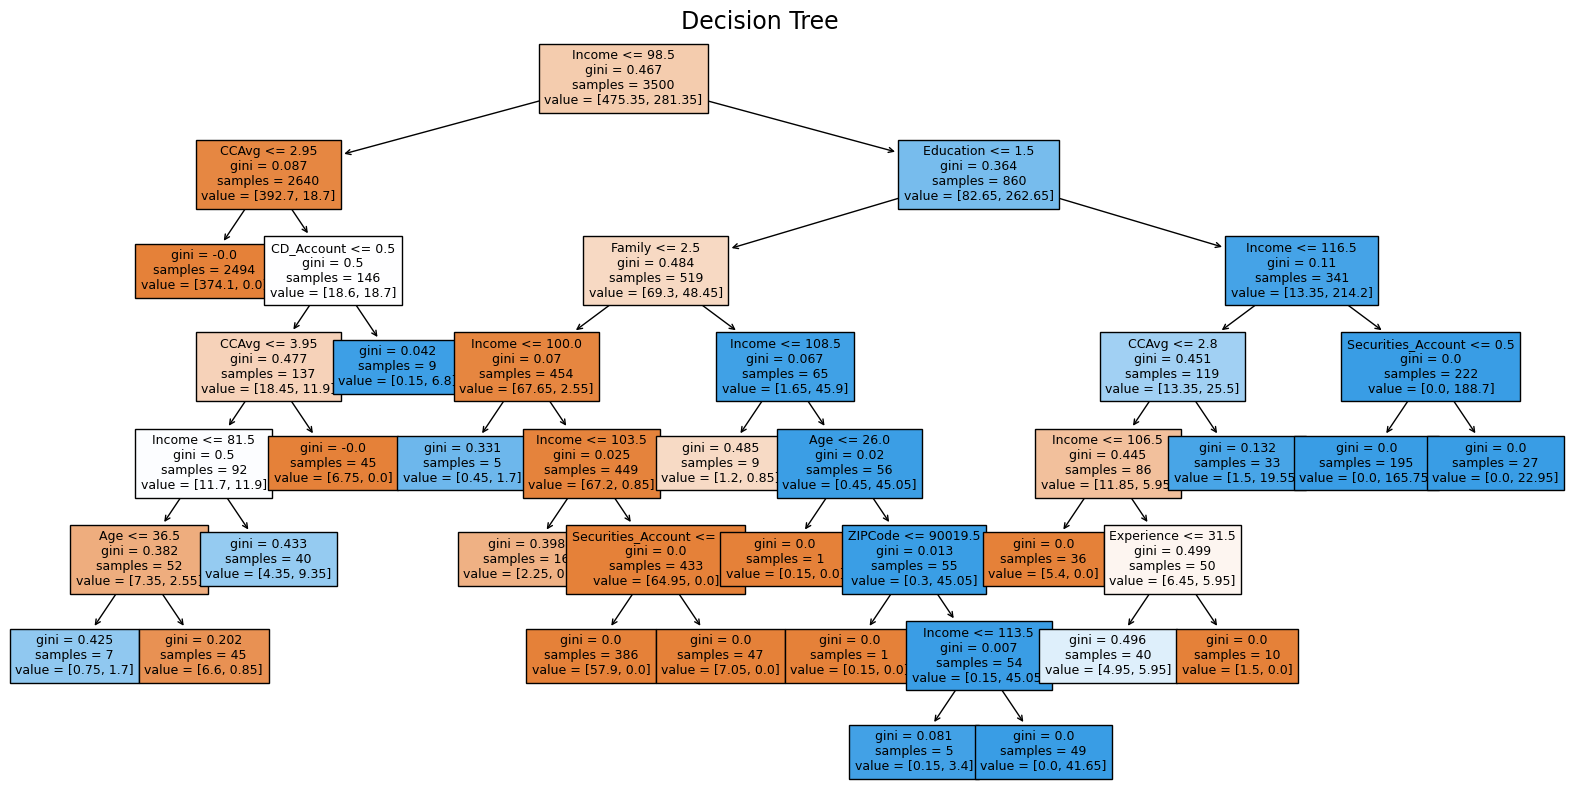

In [ ]:
# Display the Decision Tree with pre-pruning
show_decision_tree(decision_tree = model_pre_prune, feature_names = feature_names)

In [ ]:
# Display Decision Tree with pre-pruning as text
print(ste.export_text(model_pre_prune, feature_names = feature_names, show_weights = True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- weights: [0.75, 1.70] class: 1
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- weights: [6.60, 0.85] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |--- Income >  100.00
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- weights: [2.25, 0.85] class: 0
|   |   |   |   |--- Income >  103.50
|   |  

##### Visualizing the Feature Importance

In [ ]:
# Importance of features in the tree building
importances_pre_prune = model_pre_prune.feature_importances_
indices_pre_prune = np.argsort(importances_pre_prune)

importances_pre_prune

array([4.60438978e-03, 2.35771304e-03, 6.23319975e-01, 8.91207969e-04,
       1.46807625e-01, 7.96190957e-02, 1.30733900e-01, 0.00000000e+00,
       1.39108818e-15, 1.16660933e-02, 0.00000000e+00, 0.00000000e+00])

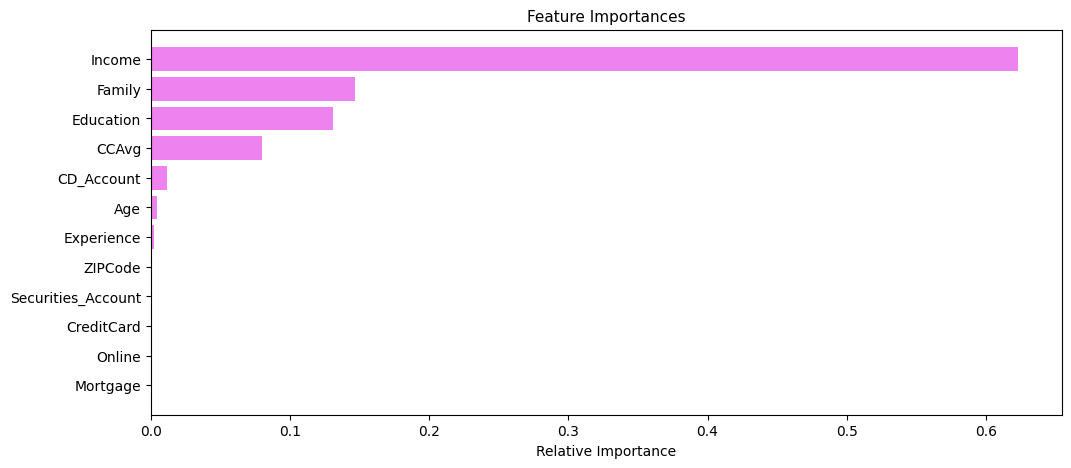

In [ ]:
# Display feature importance with pre-pruning
show_feature_importance(importances = importances_pre_prune, indices = indices_pre_prune, feature_names = feature_names)

##### Observations on Decision Tree model (Pre-pruning)

* The performance of the model shows improvement on the recall score (96.64%) of the testing set after using the following:
  * GridSearchCV Hyperparameters:
    * random_state = 1
    * class_weight = [{0: 0.15, 1: 0.85}]
    * max_depth = [np.arange(1, 15, 2), None]
    * max_leaf_nodes = [50, 75, 150, 250]
    * min_samples_split = [10, 30, 50, 70]
  * Estimator/ DecisionTreeClassifier Hyperparameters:
    * random_state = 1
    * class_weight = {0: 0.15, 1: 0.85}
    * max_leaf_nodes = 50
    * min_samples_split = 50
* The model has started to show a generalized result since the recall scores in training and testing sets are coming to a closer value:
  * Recall for training set = 99.09%
  * Recall for testing set = 96.64%
* The Decision Tree shows there are 21 decision path.
* The Decision Tree shows that when a customer meets the following conditions, is likely going to accept the loan:
  * Income is greater than 106.5K and less than or equal 116.5K
  * Education level is greater than 1
  * CCAvg is less than or equal 2.8K
  * Experience is less than or equal 31 1/2 years
* Feature importance shows the most important factor to customers when accepting a loan is Income (close to 0.63). List if followed by:
  * Family (close to 0.15)
  * Education (close to 0.13)
  * CCAvg (close to 0.08)
  * CD_Account (close to 0.01)

### Decision Tree (Post-pruning)

##### Create Decision Tree model (with Cost Complexity Pruning)

* Minimal cost complexity pruning recursively finds the node with the weakest link. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.
* To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.
* As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
# Obtain cost complexity pruning path
model_post_prune = ste.DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.15, 1: 0.85})

path = model_post_prune.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

# Display effective alphas and total impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,-0.00000
8,0.00000,-0.00000
9,0.00000,-0.00000


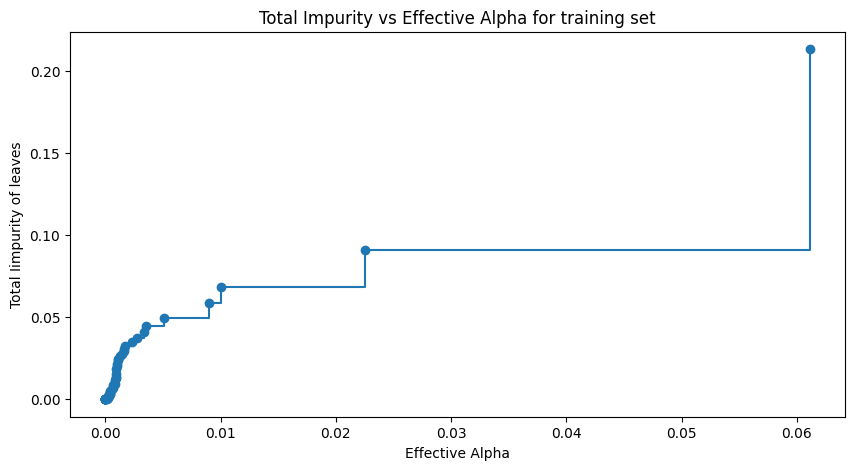

In [ ]:
# Display effective alphas with regards to total impurities
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
ax.set_title('Total Impurity vs Effective Alpha for training set')

ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Total Iimpurity of leaves')

plt.show()

* We will train a Decision Tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
# Create list of Decision Tree model with post-pruning
model_post_prune_list = []
for ccp_alpha in ccp_alphas:
    model_post_prune = ste.DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.15, 1: 0.85}, ccp_alpha = ccp_alpha)
    model_post_prune.fit(x_train, y_train)
    model_post_prune_list.append(model_post_prune)

print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(model_post_prune_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948087


* We will remove the last element in ``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one node.
* As shown below, the number of nodes and tree depth decreases as alpha increases.

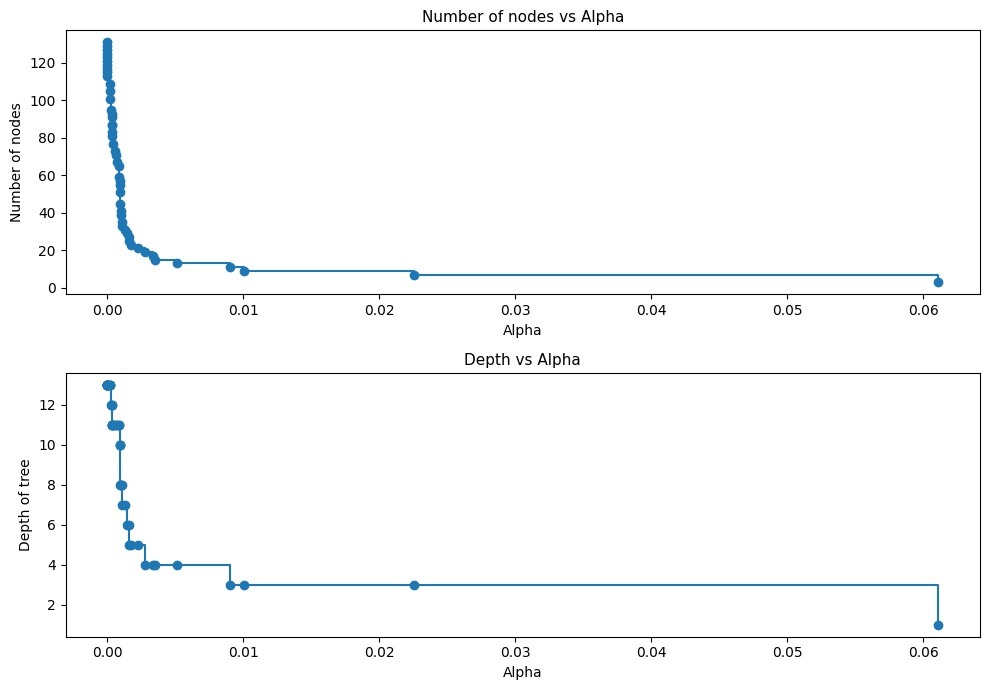

In [ ]:
# Remove the last element in the models and effective alphas
model_post_prune_list = model_post_prune_list[:-1]
ccp_alphas = ccp_alphas[:-1]

# Display number of nodes and tree depth as alpha increases
node_counts = [model_post_prune.tree_.node_count for model_post_prune in model_post_prune_list]
depth = [model_post_prune.tree_.max_depth for model_post_prune in model_post_prune_list]
fig, ax = plt.subplots(2, 1, figsize = (10, 7))

ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')
ax[0].set_title('Number of nodes vs Alpha', fontsize = 11)
ax[0].set_ylabel('Number of nodes')
ax[0].set_xlabel('Alpha')

ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = 'steps-post')
ax[1].set_title('Depth vs Alpha', fontsize = 11)
ax[1].set_ylabel('Depth of tree')
ax[1].set_xlabel('Alpha')

fig.tight_layout()

In [ ]:
# Create list of recall values of train data
recall_train_list = []
for model_post_prune in model_post_prune_list:
  pred_train = model_post_prune.predict(x_train)
  values_train = smt.recall_score(y_train, pred_train)
  recall_train_list.append(values_train)

In [ ]:
# Create list of recall values of test data
recall_test_list = []
for model_post_prune in model_post_prune_list:
  pred_test = model_post_prune.predict(x_test)
  values_test = smt.recall_score(y_test, pred_test)
  recall_test_list.append(values_test)

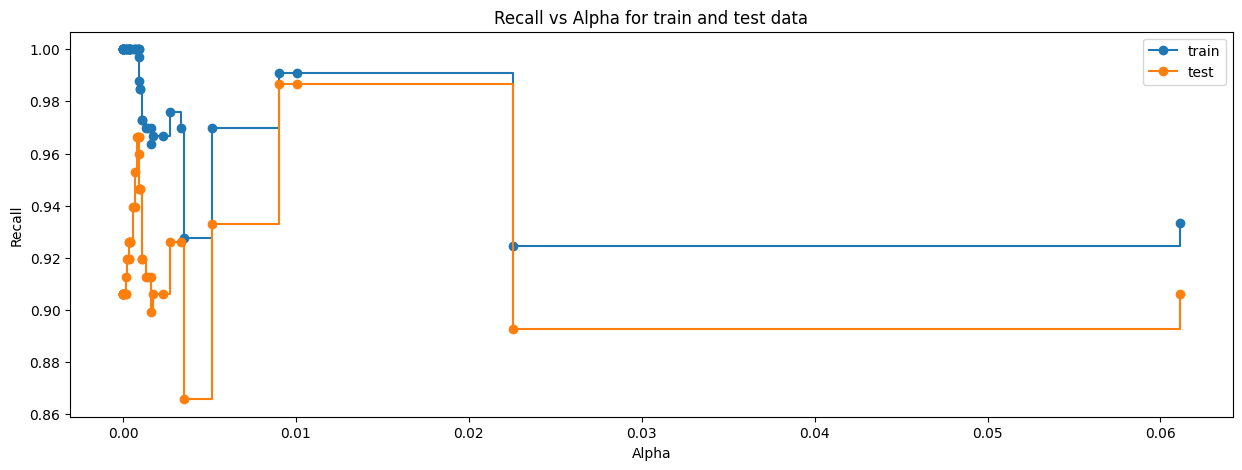

In [ ]:
# Display the distribution of Alpha with regards to Recall
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(ccp_alphas, recall_train_list, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, recall_test_list, marker = 'o', label = 'test', drawstyle = 'steps-post')

ax.set_title('Recall vs Alpha for train and test data')
ax.set_ylabel('Recall')
ax.set_xlabel('Alpha')
ax.legend()

plt.show()

##### Create Decision Tree model (using best model)

* We will use np.argmax to get the best suggested model based on the highest recall score from the testing set.
* As shown below, the best suggested model uses the following Hyperparameters:
  * random_state = 1
  * class_weight = {0: 0.15, 1: 0.85}
  * ccp_alpha = 0.00900843430150808

In [ ]:
# Create best Decision Tree model with post-pruning
index_model_post_prune = np.argmax(recall_test_list)
model_post_prune_best = model_post_prune_list[index_model_post_prune]

model_post_prune_best

DecisionTreeClassifier(ccp_alpha=0.00900843430150808,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

##### Check model performance on training set

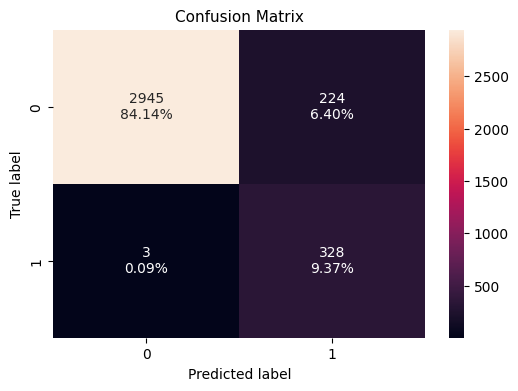

In [ ]:
# Display the best confision matrix of train data with post-pruning
show_confusion_matrix_sklearn(model = model_post_prune_best, predictors = x_train, target = y_train)

In [ ]:
# Display the best model performance of train data with post-pruning
decision_tree_perf_train_post_prune = get_model_perf_class_sklearn(model = model_post_prune_best, predictors = x_train, target = y_train)

decision_tree_perf_train_post_prune

,Accuracy,Recall,Precision,F1
0,0.93514,0.99094,0.59420,0.74292


##### Check model performance on testing set

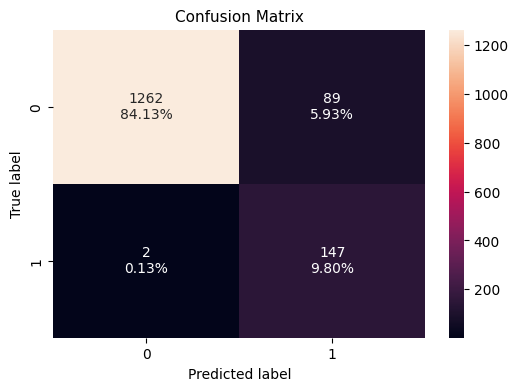

In [ ]:
# Display the best confision matrix of test data with post-pruning
show_confusion_matrix_sklearn(model = model_post_prune_best, predictors = x_test, target = y_test)

In [ ]:
# Display the best model performance of test data with post-pruning
decision_tree_perf_test_post_prune = get_model_perf_class_sklearn(model = model_post_prune_best, predictors = x_test, target = y_test)

decision_tree_perf_test_post_prune

,Accuracy,Recall,Precision,F1
0,0.93933,0.98658,0.62288,0.76364


##### Visualizing the Decision Tree

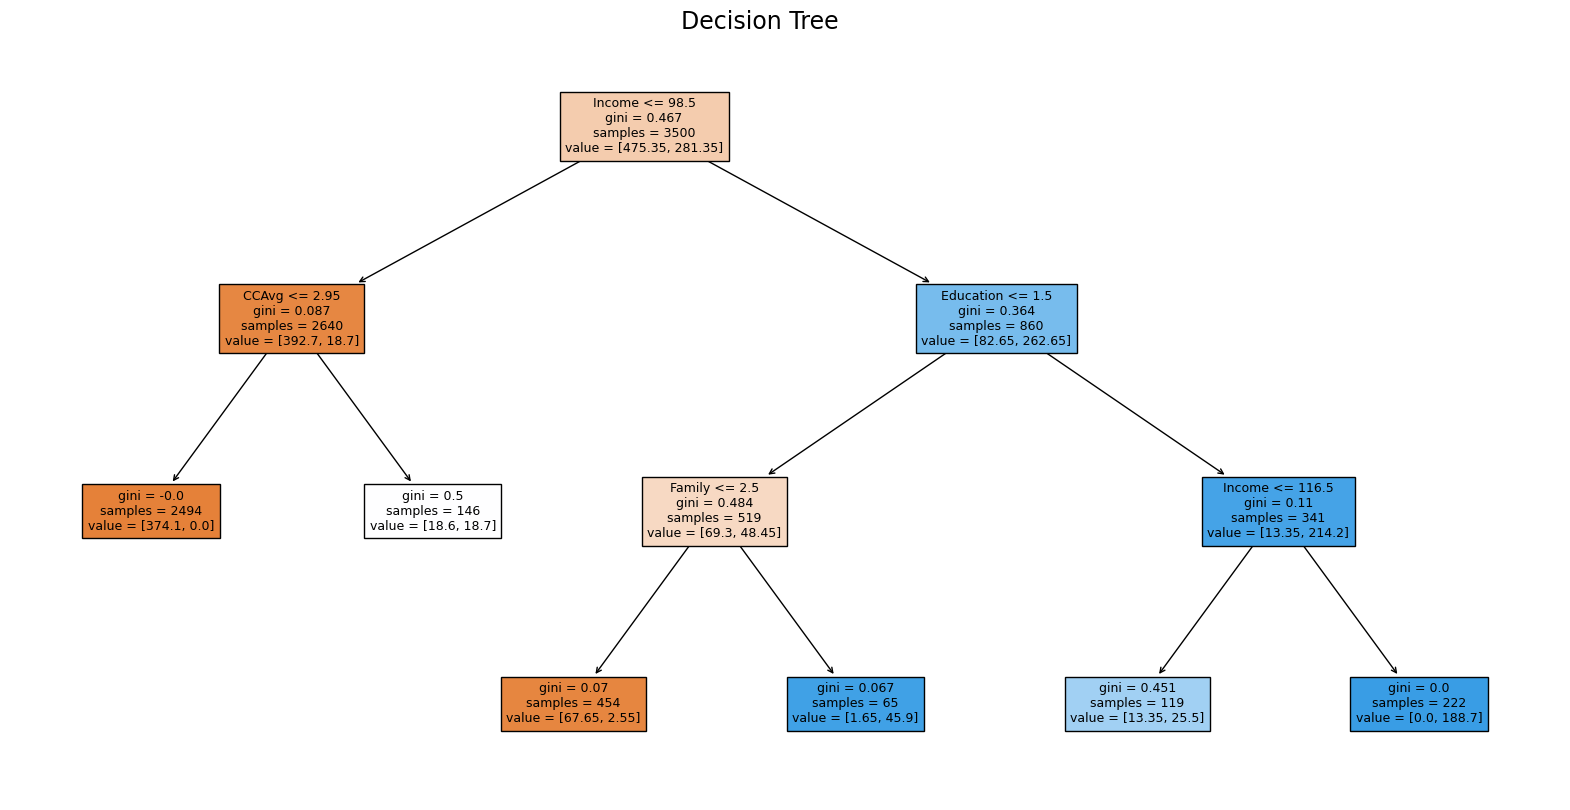

In [ ]:
# Display the best Decision Tree with post-pruning
show_decision_tree(decision_tree = model_post_prune_best, feature_names = feature_names)

In [ ]:
# Display the best Decision Tree with post-pruning as text
print(ste.export_text(model_post_prune_best, feature_names = feature_names, show_weights = True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



##### Visualizing the Feature Importance

In [ ]:
# Importance of features in the tree building
importances_post_prune = model_post_prune_best.feature_importances_
indices_post_prune = np.argsort(importances_post_prune)

importances_post_prune

array([0.        , 0.        , 0.64570378, 0.        , 0.15824002,
       0.05514161, 0.14091458, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

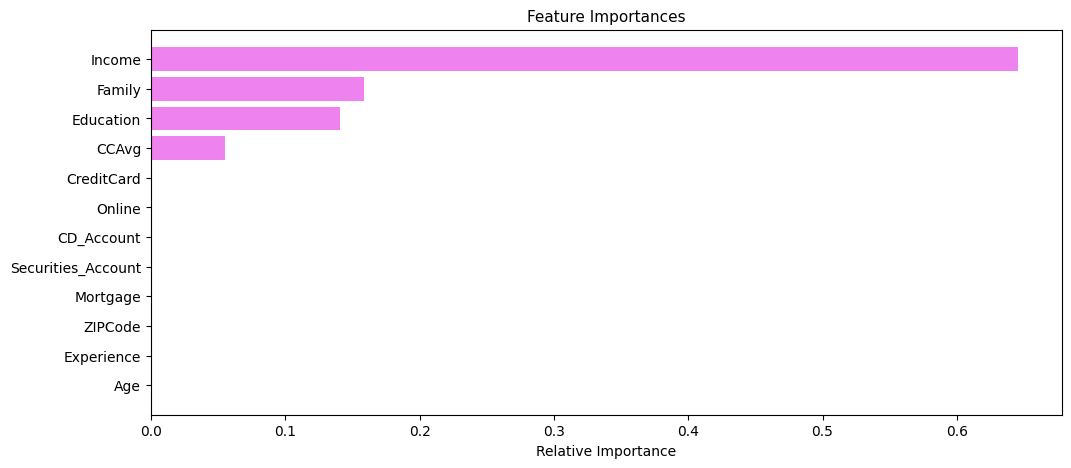

In [ ]:
# Display feature importance with post-pruning
show_feature_importance(importances = importances_post_prune, indices = indices_post_prune, feature_names = feature_names)

##### Observations on Decision Tree model (Post-pruning)

* The performance of the model shows more improvement on the recall score (98.66%) of the testing set after using the following:
  * DecisionTreeClassifier Hyperparameters:
    * random_state = 1
    * class_weight = {0: 0.15, 1: 0.85}
    * ccp_alpha = 0.00900843430150808 (from Cost Complexity Pruning)
* The model shows a more generalized result since the recall scores in training and testing sets are coming to a closer value:
  * Recall for training set = 99.09%
  * Recall for testing set = 98.66%
* The Decision Tree shows there are now 6 decision path compared to 21 decision path from the pre-pruned model.
* The Decision Tree shows that when a customer meets the following conditions, is likely going to accept the loan:
  * Income is greater than 116.5K
  * Education level is greater than 1
* Feature importance shows the most important factor to customers when accepting a loan is Income (close to 0.65). List if followed by:
  * Family (close to 0.16)
  * Education (close to 0.14)
  * CCAvg (close to 0.05)

## Model Comparison and Final Model Selection

### Comparison of model performance

##### Comparison of model performance on training sets

In [ ]:
# Display training performance comparison
df_model_train_comp = pd.concat([
  decision_tree_perf_train_wo_class_weight.transpose(),
  decision_tree_perf_train_w_class_weight.transpose(),
  decision_tree_perf_train_pre_prune.transpose(),
  decision_tree_perf_train_post_prune.transpose(),
  ],
  axis = 1
)
df_model_train_comp.columns = [
  'Decision Tree without class_weight',
  'Decision Tree with class_weight',
  'Decision Tree (Pre-pruning)',
  'Decision Tree (Post-pruning)',
]

df_model_train_comp

,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-pruning),Decision Tree (Post-pruning)
Accuracy,1.00000,1.00000,0.97571,0.93514
Recall,1.00000,1.00000,0.99094,0.99094
Precision,1.00000,1.00000,0.80000,0.59420
F1,1.00000,1.00000,0.88529,0.74292


##### Comparison of model performance on testing sets

In [ ]:
# Display testing performance comparison
df_model_test_comp = pd.concat([
  decision_tree_perf_test_wo_class_weight.transpose(),
  decision_tree_perf_test_w_class_weight.transpose(),
  decision_tree_perf_test_pre_prune.transpose(),
  decision_tree_perf_test_post_prune.transpose(),
  ],
  axis = 1,
)
df_model_test_comp.columns = [
  'Decision Tree without class_weight',
  'Decision Tree with class_weight',
  'Decision Tree (Pre-pruning)',
  'Decision Tree (Post-pruning)',
]

df_model_test_comp

,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-pruning),Decision Tree (Post-pruning)
Accuracy,0.98000,0.97400,0.97267,0.93933
Recall,0.88591,0.86577,0.96644,0.98658
Precision,0.91034,0.87162,0.80000,0.62288
F1,0.89796,0.86869,0.87538,0.76364


### Key Observations on Model Comparison

* The Decision Tree models in both Pre-pruning and Post-pruning are giving high recall scores on both training and test sets.
* We will choose the Decision Tree (Post-pruning) model as the best model since it is showing the highest recall score on the training and testing sets than the Decision Tree (Pre-pruning) model.

## Actionable Insights and Business Recommendations


### Conclusions:

* The Decision Tree (Post-pruning) model provides recall score of 99.09% for training set and 98.66% for testing set after using the following Hyperparameters:
  * random_state = 1
  * class_weight = {0: 0.15, 1: 0.85}
  * ccp_alpha = 0.00900843430150808
* The Decision Tree (Post-pruning) model shows that it can be used to predict if a customer is going to accept a loan and can approximately identify 98.66% from the potential loan customers.
* The Decision Tree (Post-pruning) model shows that it can predict 98.66% of the time that the customer will accept a loan if the customer meet the following conditions:
  * Income is greater than 98.5K
  * Education level is less than or equal 1
  * Family size is greater than 2

  OR:
  * Income is greater than 98.5K
  * Education level is greater than 1

  OR:
  * Income is less than or equal 98.5K
  * CCAvg is greater than 2.95K
* Feature importance shows that Income (close to 0.66), Family (close to 0.16), Education (close to 0.14) and CCAvg (close to 0.05) are the most important factors in predicting potential loan customers.
* Hyperparameters and pruning provides great value in tuning your model and to reduce overfitting.

### Recommendations:

* The following customer features need be thoroughly assessed when indentifying potential loan customers:
  1. Income: Majority of the customers who accepted a loan have higher income (mean value close to \$145K).
  2. Family: Majority of the customers who accepted a loan have more family members (mean value close to 2.6).
  3. Education: Majority of the customers who accepted a loan have higher education level (mean value close to 2.2).
  4. CCAvg: Majority of the customers who accepted a loan have higher credit card average spending (mean value close to \$4K).
* If possible, offer promotions to attract potential loan customers to take a loan.
* The bank should use more data for the analysis to get more reliable results such as:
  * More customer records.
  * Additional customer information, e.g. If a customer owns a credit card, or what is the customer's residential status (even if the above criteria is met, if the customer is not planning to stay in the country for a longer period of time, it is still possible that the customer is not going to take a loan due to a short term plan to stay in the country).

___